In [2]:
import wave,os,librosa,tqdm,time,warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa, os, cv2, pickle, tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from cuml.svm import SVC as cuSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
import IPython.display as ipd

In [8]:
dpath = '/kaggle/input/cremad/AudioWAV'
audio_path = os.path.join(dpath,os.listdir(dpath)[0])
y, sr = librosa.load(audio_path,sr=16000)
print(y.shape)
print(sr)

(38972,)
16000


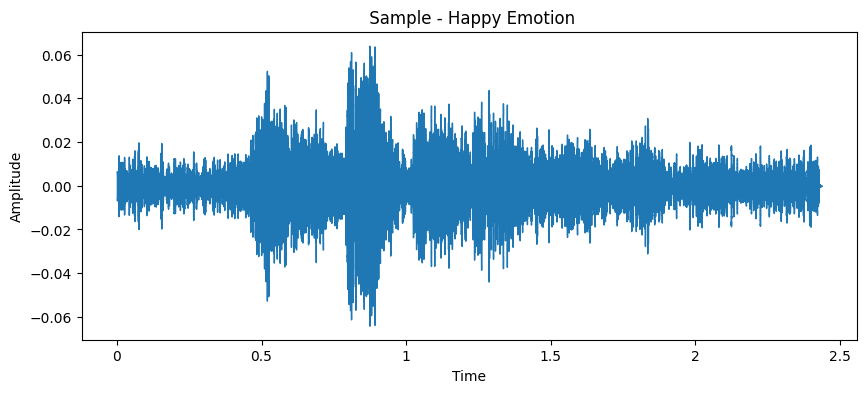

In [3]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(" Sample - Happy Emotion")
plt.ylabel("Amplitude")
plt.show()

In [4]:
pip install noisereduce

Note: you may need to restart the kernel to use updated packages.


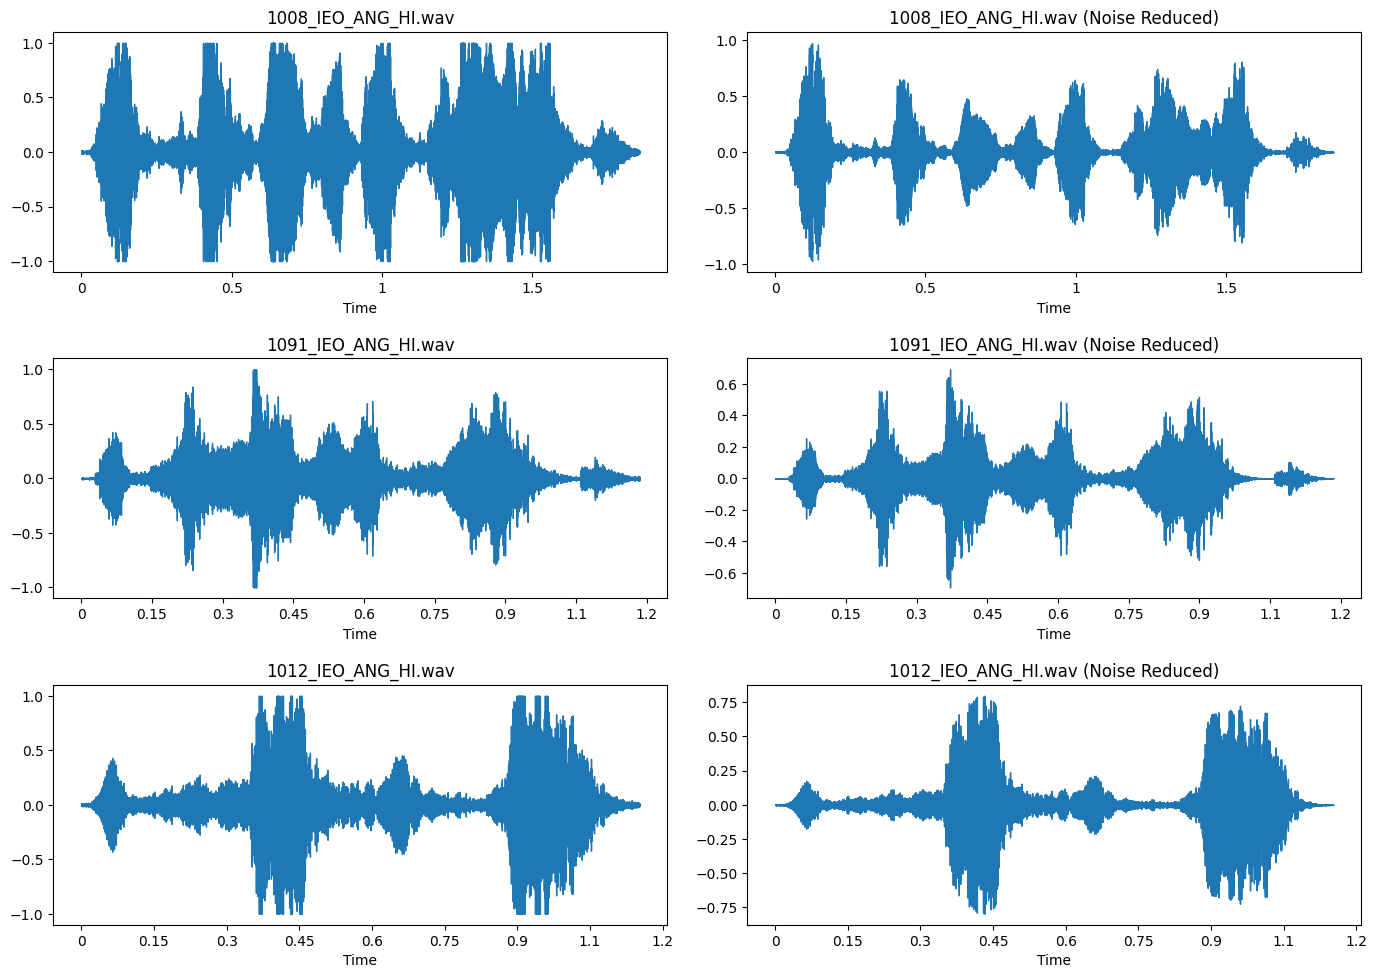

In [7]:
import noisereduce as nr
labdict = {'ANG':'angry','DIS':'disgust','FEA':'fear','HAP':'happy','NEU':'neutral','SAD':'sad'}
wavlabs = dict()
plt.figure(figsize=(14, 10))
rwav = np.random.choice(os.listdir(dpath),500)
wavs = []
i = 0
for p in rwav:
    path = os.path.join(dpath,p)
    label = labdict[p.split('_')[2]]
    its = p.split('_')[3]
    if label in ['angry','neutral','happy','sad'] and its=='HI.wav':
        i+=1
        y,sr = librosa.load(path,sr=16000)
        wavs.append(p)
        ytrim,index = librosa.effects.trim(y,top_db=25)
        yclean = nr.reduce_noise(ytrim,sr)
        plt.subplot(3,2,i)
        plt.title(p)
        #plt.ylim(-1,1)
        librosa.display.waveshow(ytrim, sr=sr)
        i+=1
        plt.subplot(3,2,i)
        plt.title(p+' (Noise Reduced)')
        #plt.ylim(-1,1)
        librosa.display.waveshow(yclean, sr=sr)
        if i==6:
            break
plt.tight_layout(pad=1.5)
plt.show()

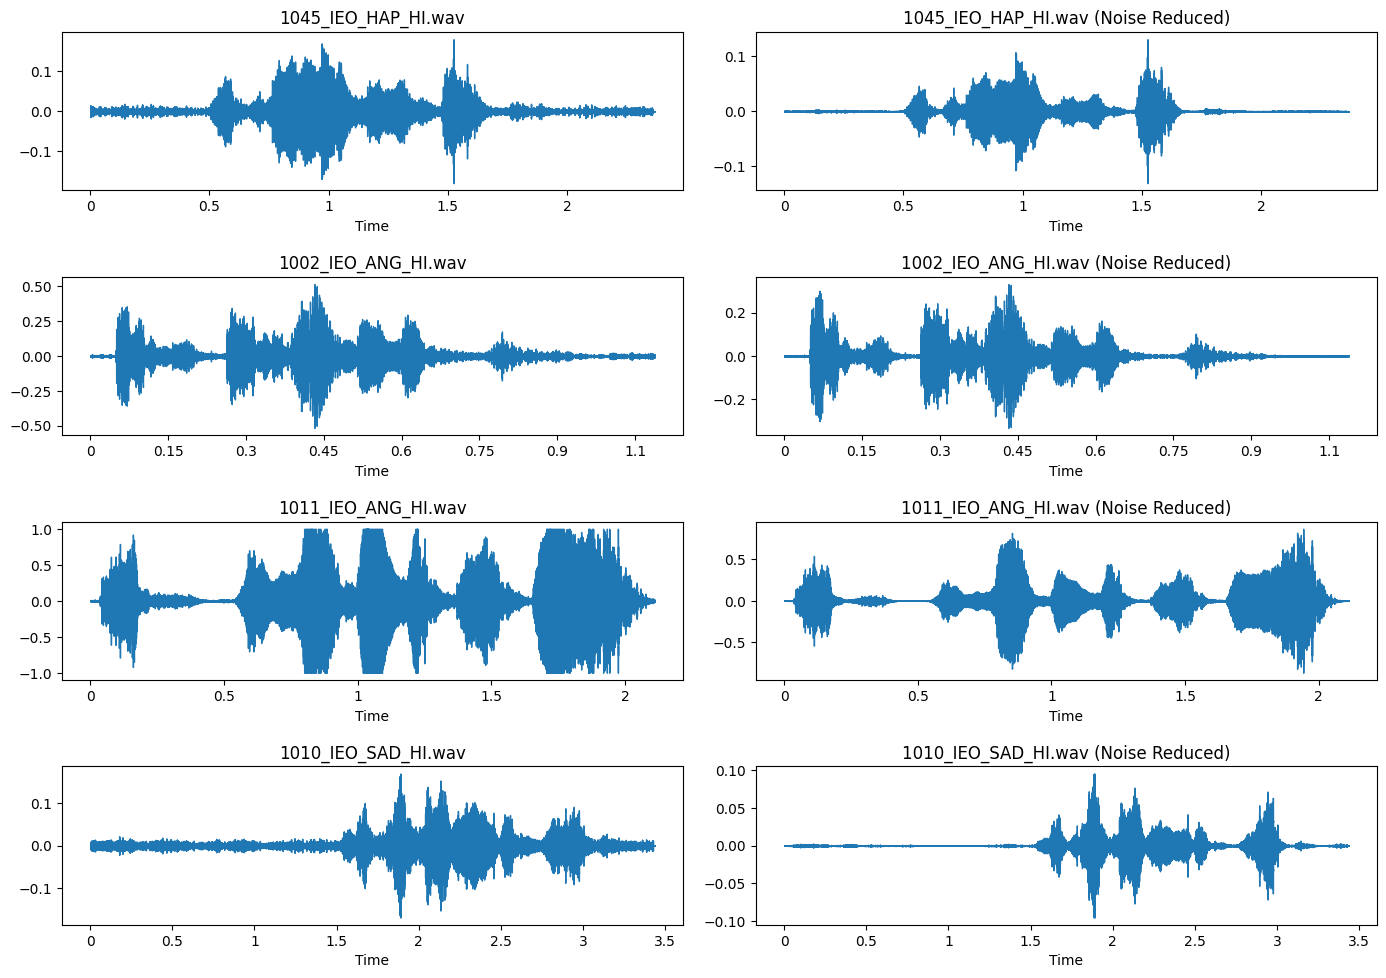

In [9]:
import noisereduce as nr
labdict = {'ANG':'angry','DIS':'disgust','FEA':'fear','HAP':'happy','NEU':'neutral','SAD':'sad'}
wavlabs = dict()
plt.figure(figsize=(14, 10))
rwav = np.random.choice(os.listdir(dpath),500)
wavs = []
i = 0
for p in rwav:
    path = os.path.join(dpath,p)
    label = labdict[p.split('_')[2]]
    its = p.split('_')[3]
    if label in ['angry','neutral','happy','sad'] and its=='HI.wav':
        i+=1
        y,sr = librosa.load(path,sr=16000)
        wavs.append(p)
        ytrim,index = librosa.effects.trim(y,top_db=25)
        yclean = nr.reduce_noise(ytrim,sr)
        plt.subplot(4,2,i)
        plt.title(p)
        #plt.ylim(-1,1)
        librosa.display.waveshow(ytrim, sr=sr)
        i+=1
        plt.subplot(4,2,i)
        plt.title(p+' (Noise Reduced)')
        #plt.ylim(-1,1)
        librosa.display.waveshow(yclean, sr=sr)
        if i==8:
            break
plt.tight_layout(pad=1.5)
plt.show()

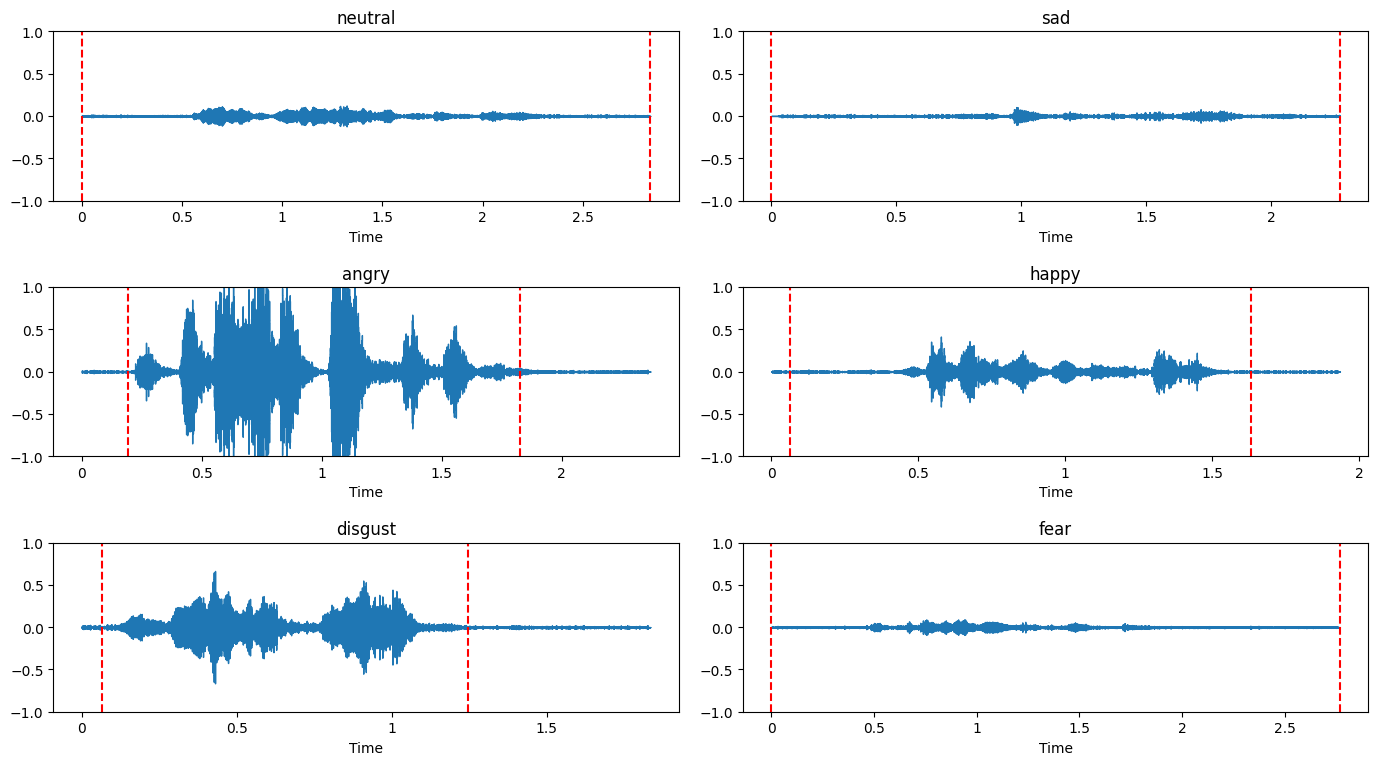

In [15]:
import noisereduce as nr
cre_labs = {'ANG':'angry','DIS':'disgust','FEA':'fear','HAP':'happy','NEU':'neutral','SAD':'sad'}
plt.figure(figsize=(14, 10))
emos,i = [],1
rwav = np.random.choice(os.listdir(dpath),500)
for wav in rwav:
  lab = cre_labs[wav.split('_')[2]]
  if lab not in emos:
    emos.append(lab)
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    plt.subplot(4,2,i)
    plt.title(f"{lab}")
    plt.ylim(-1,1)
    dur = librosa.get_duration(y=y,sr=sr)
    plt.axvline(x=dur/len(y)*index[0], color='r', linestyle='--')
    plt.axvline(x=dur/len(y)*index[1], color='r', linestyle='--')
    librosa.display.waveshow(y, sr=sr)
    i+=1
  if len(emos)==6:
    break
plt.tight_layout(pad=1.5)
plt.show()

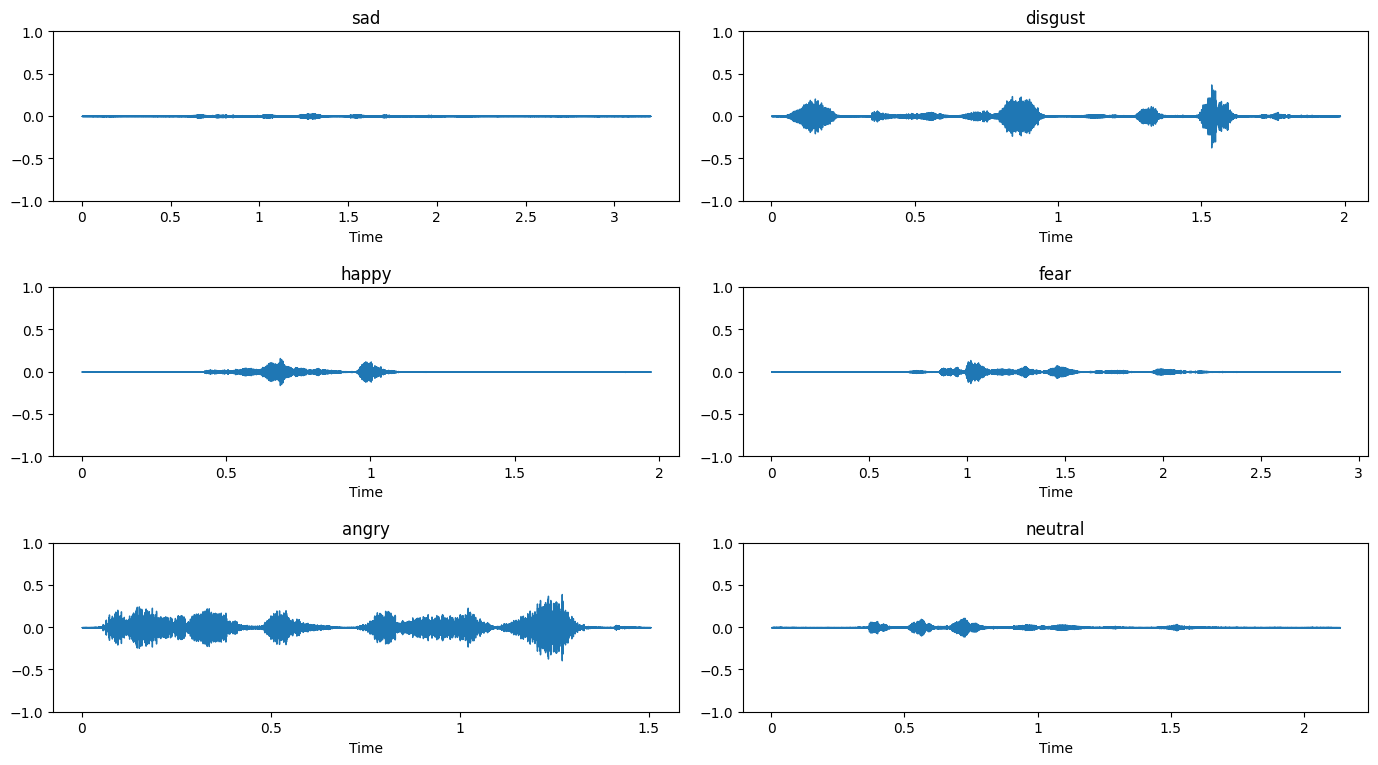

In [17]:
plt.figure(figsize=(14, 10))
emos,i = [],1
rwav = np.random.choice(os.listdir(dpath),500)
for wav in rwav:
  lab = cre_labs[wav.split('_')[2]]
  if lab not in emos:
    emos.append(lab)
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    yclean = nr.reduce_noise(y=ytrim, sr=sr)
    plt.subplot(4,2,i)
    plt.title(lab)
    plt.ylim(-1,1)
    librosa.display.waveshow(yclean, sr=sr)
    i+=1
  if len(emos)==6:
    break
plt.tight_layout(pad=1.5)
plt.show()

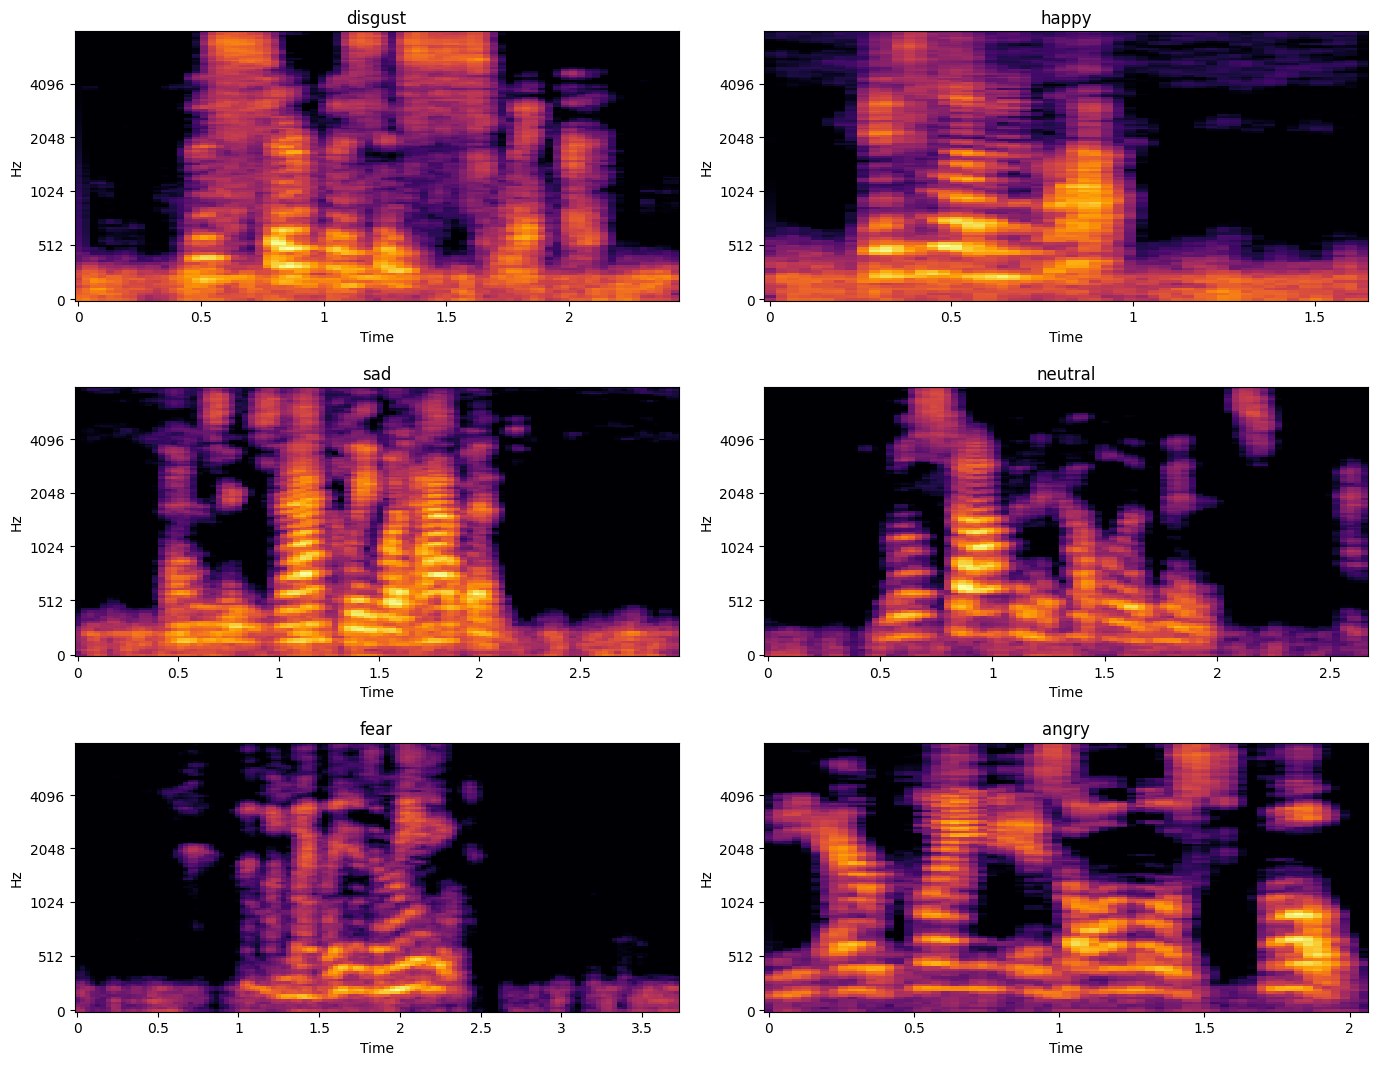

In [18]:
plt.figure(figsize=(14, 14))
emos,i = [],1
for wav in os.listdir(dpath):
  lab = cre_labs[wav.split('_')[2]]
  if lab not in emos:
    emos.append(lab)
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    yclean = nr.reduce_noise(y=ytrim, sr=sr)
    plt.subplot(4,2,i)
    plt.title(lab)
    S = librosa.feature.melspectrogram(y=yclean, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,cmap='inferno')
    i+=1
  if len(emos)==6:
    break
plt.tight_layout(pad=1.5)
plt.show()

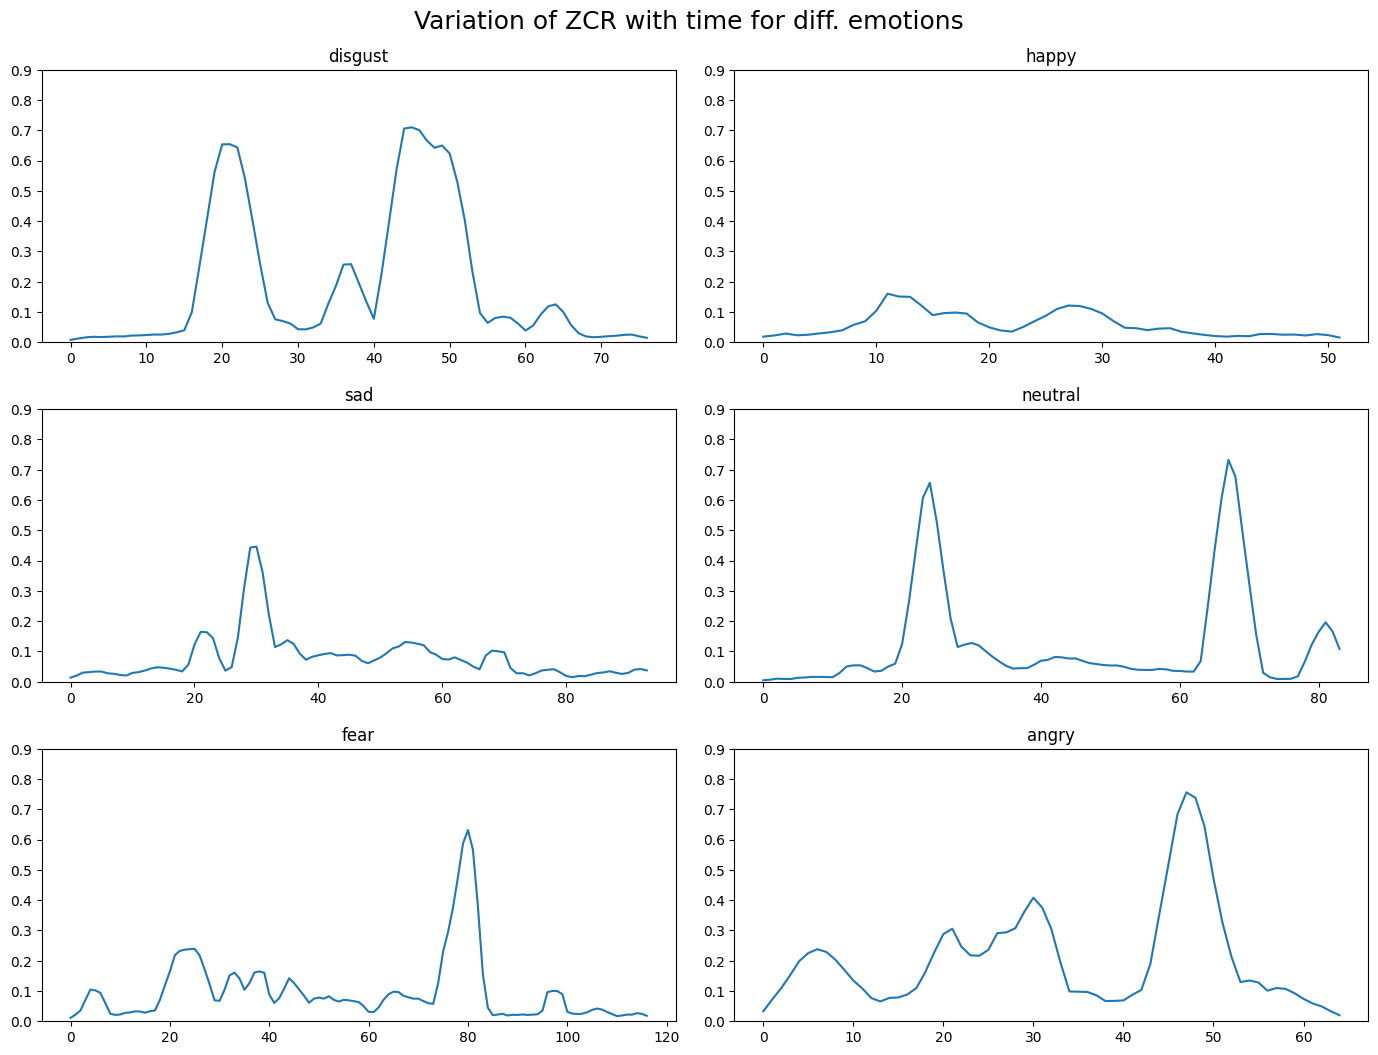

In [19]:
plt.figure(figsize=(14, 14))
emos,i = [],1
for wav in os.listdir(dpath):
  lab = cre_labs[wav.split('_')[2]]
  if lab not in emos:
    emos.append(lab)
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    yclean = nr.reduce_noise(y=ytrim, sr=sr)
    plt.subplot(4,2,i)
    plt.title(lab)
    zcr = librosa.feature.zero_crossing_rate(yclean)
    plt.ylim(0,0.9)
    plt.plot(zcr[0])
    i+=1
  if len(emos)==6:
    break
plt.suptitle("Variation of ZCR with time for diff. emotions",fontsize=18)
plt.tight_layout(pad=1.5)
plt.show()

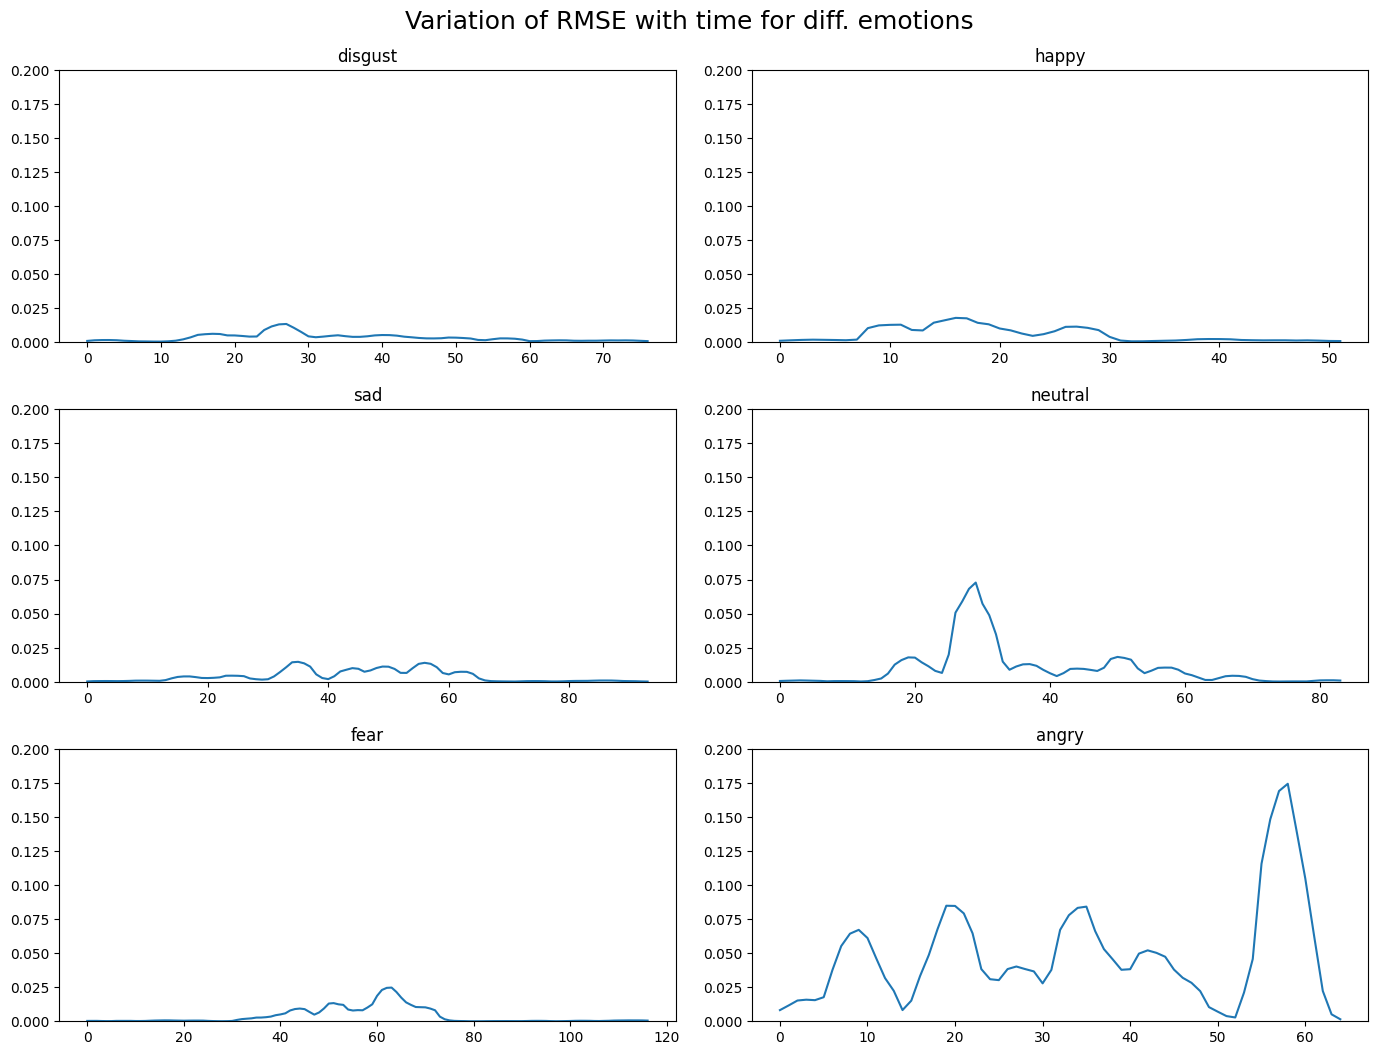

In [20]:
plt.figure(figsize=(14, 14))
emos,i = [],1
for wav in os.listdir(dpath):
  lab = cre_labs[wav.split('_')[2]]
  if lab not in emos:
    emos.append(lab)
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    yclean = nr.reduce_noise(y=ytrim, sr=sr)
    plt.subplot(4,2,i)
    plt.title(lab)
    rmse = librosa.feature.rms(y=yclean)
    plt.ylim(0,0.2)
    plt.plot(rmse[0])
    i+=1
  if len(emos)==6:
    break
plt.suptitle("Variation of RMSE with time for diff. emotions",fontsize=18)
plt.tight_layout(pad=1.5)
plt.show()

In [21]:
audio_path = os.path.join(dpath,os.listdir(dpath)[0])
y, sr = librosa.load(audio_path,sr=16000)
ytrim, index = librosa.effects.trim(y,top_db=25)
yclean = nr.reduce_noise(y=ytrim, sr=sr)
dur = librosa.get_duration(y=yclean,sr=sr)
print("Duration:", dur)

mfcc = librosa.feature.mfcc(y=yclean, sr=sr, n_mfcc=13)
print("MFCC:", mfcc.shape)

mfcc2 = librosa.feature.mfcc(y=yclean, sr=sr, n_mfcc=20)
print("MFCC:", mfcc2.shape)

mfsp=librosa.feature.melspectrogram(y=yclean, sr=sr)
print("MFSP:", mfsp.shape)

zcr = librosa.feature.zero_crossing_rate(yclean)
print("Zero Crossing Rate:", zcr.shape)

rms = librosa.feature.rms(y=yclean)
print("RMS:", rms.shape)

chroma_stft = librosa.feature.chroma_stft(y=yclean, sr=sr)
print("Chroma STFT:", chroma_stft.shape)

spectral_contrast = librosa.feature.spectral_contrast(y=yclean, sr=sr)
print("Spectral Contrast:", spectral_contrast.shape)

tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(yclean), sr=sr)
print("Tonnetz:", tonnetz.shape)

Duration: 2.43575
MFCC: (13, 77)
MFCC: (20, 77)
MFSP: (128, 77)
Zero Crossing Rate: (1, 77)
RMS: (1, 77)
Chroma STFT: (12, 77)
Spectral Contrast: (7, 77)
Tonnetz: (6, 77)


In [43]:
from scipy.stats import skew, kurtosis
def compute_statistics(feature, name):
    stats = {}
    stats[f'{name}_mean'] = np.mean(feature)
    stats[f'{name}_std'] = np.std(feature)
    stats[f'{name}_median'] = np.median(feature)
    stats[f'{name}_min'] = np.min(feature)
    stats[f'{name}_max'] = np.max(feature)
    stats[f'{name}_range'] = np.max(feature) - np.min(feature)
    stats[f'{name}_skewness'] = skew(feature)
    stats[f'{name}_kurtosis'] = kurtosis(feature)
    stats[f'{name}_25_%tile'] = np.percentile(feature, 25)
    stats[f'{name}_75_%tile'] = np.percentile(feature, 75)
    return stats
def extract_features(audio, sr):
    features = {}
    audio, _ = librosa.effects.trim(audio,top_db=20)
    audio = nr.reduce_noise(y=audio, sr=sr)
    if np.sum(np.isnan(audio))>0:
        return 0
    mfs=librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128,fmax=8000).mean(axis=1)
    for i, value in enumerate(mfs):
        features[f'mfs{i+1}'] = value

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20).mean(axis=1)
    for i, value in enumerate(mfcc):
        features[f'mfcc{i+1}'] = value

    zcr = librosa.feature.zero_crossing_rate(audio)
    stats = compute_statistics(zcr[0], 'zcr')
    features.update(stats)

    rms = librosa.feature.rms(y=audio)
    stats = compute_statistics(rms[0], 'rms')
    features.update(stats)

    chroma = librosa.feature.chroma_stft(y=audio, sr=sr).mean(axis=1)
    for i, value in enumerate(chroma):
        features[f'chroma{i+1}'] = value

    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr).mean(axis=1)
    for i, value in enumerate(spectral_contrast):
        features[f'spectral_contrast{i+1}'] = value

    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sr).mean(axis=1)
    for i, value in enumerate(tonnetz):
        features[f'tonnetz{i+1}'] = value
    return features

100%|██████████| 7442/7442 [36:15<00:00,  3.42it/s]


,mfs1,mfs2,mfs3,mfs4,mfs5,mfs6,mfs7,mfs8,mfs9,mfs10,...,spectral_contrast5,spectral_contrast6,spectral_contrast7,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,label
0,0.002623,0.001396,0.001924,0.002744,0.004027,0.007103,0.011077,0.013218,0.024847,0.018338,...,26.400070,38.527629,23.492026,0.015381,-0.012422,-0.105655,-0.019672,0.007007,0.012496,disgust
1,0.006485,0.005287,0.005749,0.008229,0.006079,0.003938,0.005943,0.014424,0.062798,0.216018,...,25.892634,23.371475,16.628296,0.003880,0.022485,-0.032189,-0.075089,0.056970,0.002570,happy
2,0.000178,0.002433,0.007462,0.004324,0.007019,0.009113,0.058549,0.054300,0.076637,0.107077,...,29.672101,23.971414,24.403650,0.003589,0.028384,-0.185712,0.027113,0.030109,-0.020663,happy
3,0.010380,0.005014,0.008693,0.027696,0.056692,1.118112,1.766167,10.305630,1.871540,0.178354,...,22.340157,20.758986,16.715712,0.098090,0.072312,0.116666,-0.224413,0.036498,0.002459,disgust
4,0.006408,0.004041,0.004868,0.049944,0.054115,0.009213,0.010143,0.015567,0.061086,0.094967,...,25.097815,22.971083,18.640203,0.026246,-0.053235,0.045788,0.036879,0.016800,0.025744,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7436,0.005237,0.003045,0.004238,0.014994,0.016808,0.017379,0.027611,0.123947,0.459641,0.436703,...,27.983829,26.957299,17.268023,0.059969,0.014625,-0.033092,-0.024429,0.023034,0.005991,angry
7437,0.000932,0.004232,0.013059,0.045466,0.076840,0.505811,0.836050,0.535685,0.427407,0.768204,...,26.356438,27.418096,18.942220,-0.028369,0.003592,-0.044170,-0.052332,0.002054,-0.002394,angry
7438,0.003561,0.001469,0.001767,0.013737,0.042231,0.311419,0.291032,0.536210,0.618459,0.749315,...,31.406925,26.559391,21.147371,0.040838,-0.073778,-0.053573,-0.206587,0.018030,0.061686,angry
7439,0.001962,0.000920,0.001178,0.005777,0.012551,0.008476,0.002173,0.003000,0.036976,0.091195,...,23.289996,19.906455,16.683907,-0.019501,0.095059,-0.065825,-0.002430,0.023742,0.038807,sad


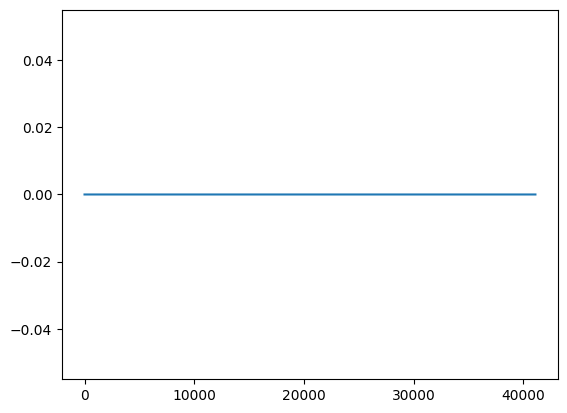

In [44]:
import warnings,tqdm
warnings.filterwarnings('ignore')
feats = []
for wav in tqdm.tqdm(os.listdir(dpath)):
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    feat = extract_features(audio=y,sr=sr)
    if feat==0:
        plt.plot(y)
        continue
    label = cre_labs[wav.split('_')[2]]
    feat['label'] = label
    feats.append(feat)
df = pd.DataFrame(feats)
df

In [45]:
df

,mfs1,mfs2,mfs3,mfs4,mfs5,mfs6,mfs7,mfs8,mfs9,mfs10,...,spectral_contrast5,spectral_contrast6,spectral_contrast7,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,label
0,0.002623,0.001396,0.001924,0.002744,0.004027,0.007103,0.011077,0.013218,0.024847,0.018338,...,26.400070,38.527629,23.492026,0.015381,-0.012422,-0.105655,-0.019672,0.007007,0.012496,disgust
1,0.006485,0.005287,0.005749,0.008229,0.006079,0.003938,0.005943,0.014424,0.062798,0.216018,...,25.892634,23.371475,16.628296,0.003880,0.022485,-0.032189,-0.075089,0.056970,0.002570,happy
2,0.000178,0.002433,0.007462,0.004324,0.007019,0.009113,0.058549,0.054300,0.076637,0.107077,...,29.672101,23.971414,24.403650,0.003589,0.028384,-0.185712,0.027113,0.030109,-0.020663,happy
3,0.010380,0.005014,0.008693,0.027696,0.056692,1.118112,1.766167,10.305630,1.871540,0.178354,...,22.340157,20.758986,16.715712,0.098090,0.072312,0.116666,-0.224413,0.036498,0.002459,disgust
4,0.006408,0.004041,0.004868,0.049944,0.054115,0.009213,0.010143,0.015567,0.061086,0.094967,...,25.097815,22.971083,18.640203,0.026246,-0.053235,0.045788,0.036879,0.016800,0.025744,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7436,0.005237,0.003045,0.004238,0.014994,0.016808,0.017379,0.027611,0.123947,0.459641,0.436703,...,27.983829,26.957299,17.268023,0.059969,0.014625,-0.033092,-0.024429,0.023034,0.005991,angry
7437,0.000932,0.004232,0.013059,0.045466,0.076840,0.505811,0.836050,0.535685,0.427407,0.768204,...,26.356438,27.418096,18.942220,-0.028369,0.003592,-0.044170,-0.052332,0.002054,-0.002394,angry
7438,0.003561,0.001469,0.001767,0.013737,0.042231,0.311419,0.291032,0.536210,0.618459,0.749315,...,31.406925,26.559391,21.147371,0.040838,-0.073778,-0.053573,-0.206587,0.018030,0.061686,angry
7439,0.001962,0.000920,0.001178,0.005777,0.012551,0.008476,0.002173,0.003000,0.036976,0.091195,...,23.289996,19.906455,16.683907,-0.019501,0.095059,-0.065825,-0.002430,0.023742,0.038807,sad


In [46]:
df['label'].value_counts()

label
disgust    1271
happy      1271
angry      1271
fear       1271
sad        1270
neutral    1087
Name: count, dtype: int64

In [48]:
df.to_csv('/kaggle/working/CREMA_D_MFCC_etc_features_trim_NR.csv',index=False)

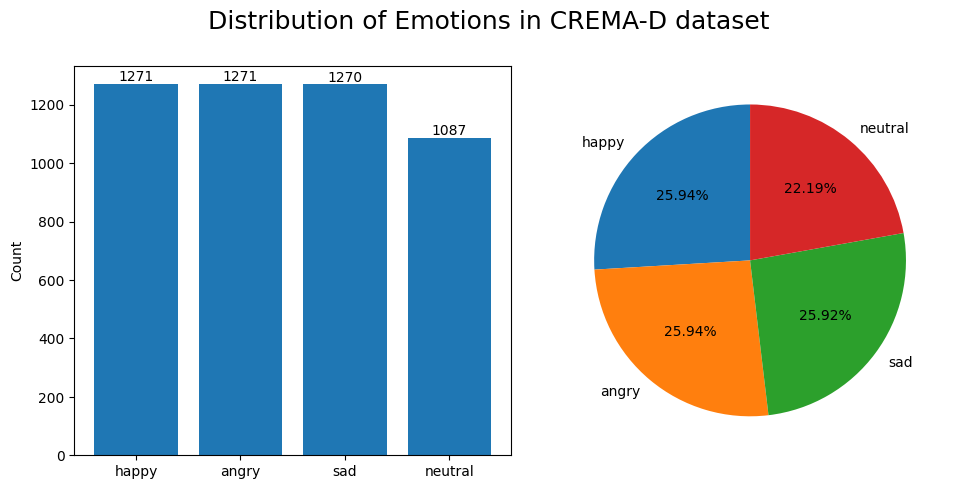

In [3]:
df = pd.read_csv('/kaggle/input/crema-d-mfcc-etc-features-trim-nr/CREMA_D_MFCC_etc_features_trim_NR.csv')
df = df[df['label'].isin(['happy','angry','sad','neutral'])]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)
plt.ylabel("Count")
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),bar.get_height(), ha='center', va='bottom')
plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90)
plt.ylabel('')
plt.suptitle('Distribution of Emotions in CREMA-D dataset', fontsize=18)
plt.tight_layout(pad=1.5)
plt.show()

In [36]:
xmfs = df[[c for c in df.columns if c.startswith("mfs")]]
xmfcc = df[[c for c in df.columns if c.startswith("mfcc")]]
xzcr = df[[c for c in df.columns if c.startswith("zcr")]]
xrmse = df[[c for c in df.columns if c.startswith("rms")]]
xchr = df[[c for c in df.columns if c.startswith("chroma")]]
xspc = df[[c for c in df.columns if c.startswith("spectral_contrast")]]
xton = df[[c for c in df.columns if c.startswith("tonnetz")]]
xall = df.drop('label',axis=1)
y = df['label']

In [22]:
def preprocess_split_train_test(df,model,name,apply_smote=False,rs=536,printres=True,returnModelFiles=False,apply_LDA=True,hppms=None):
  x = df.drop(['label'], axis=1)
  y = df['label']
  trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2, random_state=rs,stratify=y)
  if apply_LDA:
    lda = LinearDiscriminantAnalysis()
    trainX = lda.fit_transform(trainX, trainY)
    testX = lda.transform(testX)
  le = LabelEncoder()
  y2 = le.fit_transform(y)
  if name=='XGBoost':
    trainY, testY = le.transform(trainY), le.transform(testY)
  if apply_smote:
    smote = SMOTE(random_state=42)
    trainX, trainY = smote.fit_resample(trainX, trainY)
  scaler = StandardScaler()
  trainX = scaler.fit_transform(trainX)
  testX = scaler.transform(testX)
  try:
      model.fit(trainX, trainY)
  except TypeError:
      return 0
  predictions = model.predict(testX)
  acc = accuracy_score(testY, predictions)
  if printres:
    plot_confusion_matrix(testY, predictions,le.classes_)
    print(f"\n{name} Accuracy: {acc*100:.3f}%")
    print(classification_report(testY, predictions))
  if returnModelFiles:
    return model,scaler,acc
  if hppms:
    return acc,hppms
  return acc

In [5]:
def plot_confusion_matrix(y_true, y_pred,labels):
  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.show()

In [17]:
def getRandparams(mname):
    if mname == 'SVM':
        model_params = {
            'C': 10**np.random.uniform(np.log10(0.01), np.log10(10)),
            'kernel': np.random.choice(['linear', 'poly', 'rbf', 'sigmoid']),
            'gamma': 10**np.random.uniform(np.log10(0.00005), np.log10(0.0003)),
            'coef0': 10**np.random.uniform(0, np.log10(0.1)),
            'class_weight': np.random.choice(['balanced', None]),
            'decision_function_shape': np.random.choice(['ovo', 'ovr']),
            'random_state': np.random.randint(0, 1000),
        }
    elif mname == 'XGBoost':
        model_params = {
            'learning_rate': np.random.uniform(0.01, 0.5),
            'n_estimators': np.random.randint(50, 200),
            'max_depth': np.random.randint(3, 20),
            'min_child_weight': np.random.randint(1, 10),
            'gamma': np.random.uniform(0, 1),
            'subsample': np.random.uniform(0.3, 1),
            'colsample_bytree': np.random.uniform(0.5, 1),
            'reg_alpha': np.random.uniform(0, 1),
            'reg_lambda': np.random.uniform(0, 1),
            'scale_pos_weight': np.random.uniform(1, 15),
            'random_state': np.random.randint(0, 1000),
        }
    elif mname == 'LogisticRegression':
        model_params = {
            'C': 10**np.random.uniform(np.log10(0.001), np.log10(10)),
            'solver': np.random.choice(['newton-cg', 'lbfgs', 'sag', 'saga']),
            'class_weight': np.random.choice(['balanced', None]),
            'penalty': np.random.choice(['l1', 'l2', 'elasticnet', None]),
            'random_state': np.random.randint(0, 1000),
        }
        if model_params['solver'] in ['lbfgs','sag','newton-cg']:
            model_params['penalty'] = np.random.choice(['l2', None])
        if model_params['penalty']=='elasticnet':
            model_params['solver'] = 'saga'
    elif mname == 'RandomForest':
        model_params = {
            'n_estimators': np.random.randint(50, 600),
            'max_depth': np.random.randint(3, 50),
            'min_samples_split': np.random.randint(2, 20),
            'min_samples_leaf': np.random.randint(1, 10),
            'max_features': np.random.choice(['sqrt', 'log2', None]),
            'bootstrap': np.random.choice([True, False]),
            'class_weight': np.random.choice(['balanced', 'balanced_subsample', None]),
            'random_state': np.random.randint(0, 1000),
        }
    elif mname == 'KNN':
        model_params = {
            'n_neighbors': np.random.randint(3, 40),
            'weights': np.random.choice(['uniform', 'distance']),
            'algorithm': np.random.choice(['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size': np.random.randint(20, 50),
            'p': np.random.choice([1, 2]),  # Minkowski metric (p=1 for Manhattan, p=2 for Euclidean)
        }
    elif mname == 'DecisionTree':
        model_params = {
            'criterion': np.random.choice(['gini', 'entropy', 'log_loss']),
            'splitter': np.random.choice(['best', 'random']),
            'max_depth': np.random.randint(3, 50),
            'min_samples_split': np.random.randint(2, 20),
            'min_samples_leaf': np.random.randint(1, 10),
            'max_features': np.random.choice([None, 'sqrt', 'log2']),
            'random_state': np.random.randint(0, 1000),
        }
    else:
        raise ValueError(f"Unsupported model name: {mname}")
    
    return model_params


In [27]:
def tune_ML_hppms(mname,model,iters=20,rs=None):
    hpr = []
    max_acc = 0
    best_model_params,best_prep_params,phist = dict(),dict(),dict()
    st0 = time.time()
    all_params = dict()
    for k in range(iters):
        st = time.time()
        model_params = getRandparams(mname)
        prep_params = {'rs':np.random.randint(0, 1000),
                       'apply_smote':np.random.choice([True,False]),
                        'apply_LDA':np.random.choice([True,False])}
        if rs:
            prep_params['rs'] = rs
        all_params = {**model_params, **prep_params}
        fparams = frozenset(all_params.items())
        #update model params
        model.set_params(**model_params)
        print(f"Iter No. - {k}")
        print(f"Model Params = {model_params}")
        print(f"Preprocessing Params = {prep_params}")
        acc = preprocess_split_train_test(df,model,mname,**prep_params,printres=False)
        en = time.time()
        tm = en-st
        tm0 = en-st0
        print(f"Time taken = {int(tm/60)} min {int(tm%60)} sec")
        ipd.clear_output(wait=True)
        print(f"Total Time taken = {int(tm0/60)} min {int(tm0%60)} sec")
        phist[fparams] = acc
        if acc>max_acc:
            max_acc = acc
            best_model_params = model_params
            best_prep_params = prep_params
            best_iter = k
        print(f"\nCurrent Accuracy = {acc*100:.2f}%")
        print(f"Best Accuracy = {max_acc*100:.2f}% at iter={best_iter}")
        print(f"Best Model Params Found so far = {best_model_params}\n")
        print(f"Best Preprocessing Params Found so far = {best_prep_params}\n")
    print("Hyperparameter Tuning Done!")
    model.set_params(**best_model_params)
    acc = preprocess_split_train_test(df,model,mname,**best_prep_params)
    return max_acc,best_model_params,best_prep_params

Total Time taken = 4 min 32 sec

Current Accuracy = 66.94%
Best Accuracy = 67.24% at iter=17
Best Model Params Found so far = {'n_neighbors': 36, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 31, 'p': 1}

Best Preprocessing Params Found so far = {'rs': 650, 'apply_smote': False, 'apply_LDA': False}

Hyperparameter Tuning Done!


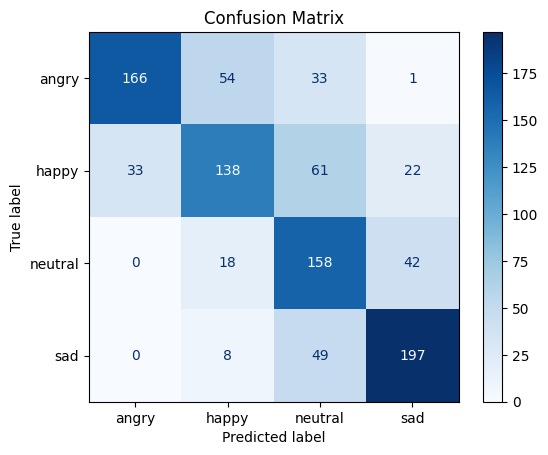


KNN Accuracy: 67.245%
              precision    recall  f1-score   support

       angry       0.83      0.65      0.73       254
       happy       0.63      0.54      0.58       254
     neutral       0.52      0.72      0.61       218
         sad       0.75      0.78      0.76       254

    accuracy                           0.67       980
   macro avg       0.69      0.67      0.67       980
weighted avg       0.69      0.67      0.67       980



In [9]:
knn_model = KNeighborsClassifier()
max_acc,best_model_params,best_prep_params = tune_ML_hppms('KNN',knn_model,iters=500)

Total Time taken = 4 min 42 sec

Current Accuracy = 65.51%
Best Accuracy = 68.57% at iter=457
Best Model Params Found so far = {'n_neighbors': 20, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 35, 'p': 2}

Best Preprocessing Params Found so far = {'rs': 650, 'apply_smote': False, 'apply_LDA': True}

Hyperparameter Tuning Done!


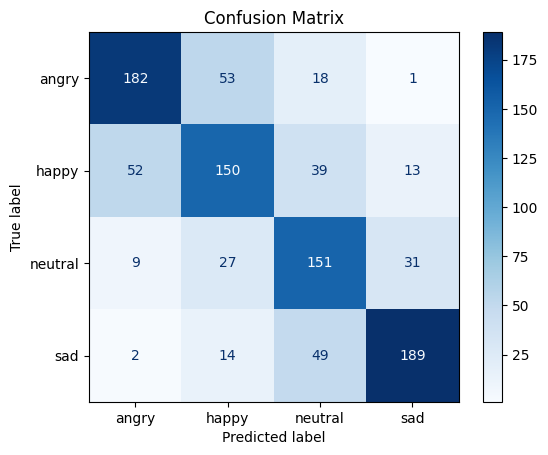


KNN Accuracy: 68.571%
              precision    recall  f1-score   support

       angry       0.74      0.72      0.73       254
       happy       0.61      0.59      0.60       254
     neutral       0.59      0.69      0.64       218
         sad       0.81      0.74      0.77       254

    accuracy                           0.69       980
   macro avg       0.69      0.69      0.69       980
weighted avg       0.69      0.69      0.69       980



In [39]:
knn_model = KNeighborsClassifier()
max_acc,best_model_params,best_prep_params = tune_ML_hppms('KNN',knn_model,iters=500,rs=650)

Total Time taken = 1 min 53 sec

Current Accuracy = 26.63%
Best Accuracy = 65.82% at iter=98
Best Model Params Found so far = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': None, 'random_state': 167}

Best Preprocessing Params Found so far = {'rs': 930, 'apply_smote': False, 'apply_LDA': True}

Hyperparameter Tuning Done!


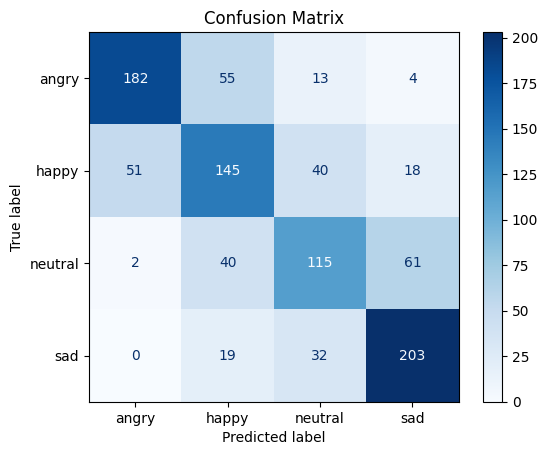


DecisionTree Accuracy: 65.816%
              precision    recall  f1-score   support

       angry       0.77      0.72      0.74       254
       happy       0.56      0.57      0.57       254
     neutral       0.57      0.53      0.55       218
         sad       0.71      0.80      0.75       254

    accuracy                           0.66       980
   macro avg       0.65      0.65      0.65       980
weighted avg       0.66      0.66      0.66       980



In [10]:
dt_model = DecisionTreeClassifier()
max_acc,best_model_params,best_prep_params = tune_ML_hppms('DecisionTree',dt_model,iters=500)

Total Time taken = 1 min 52 sec

Current Accuracy = 62.24%
Best Accuracy = 66.63% at iter=20
Best Model Params Found so far = {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'random_state': 931}

Best Preprocessing Params Found so far = {'rs': 930, 'apply_smote': False, 'apply_LDA': True}

Hyperparameter Tuning Done!


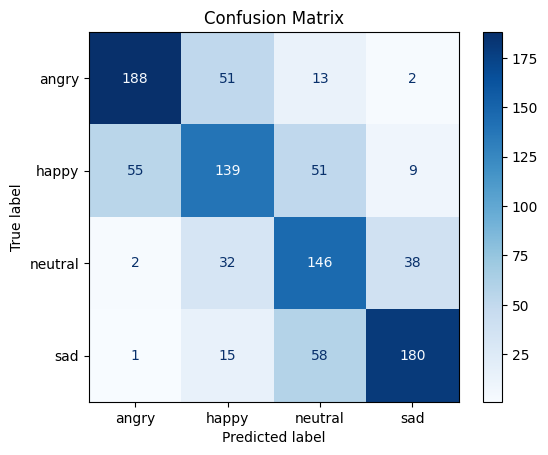


DecisionTree Accuracy: 66.633%
              precision    recall  f1-score   support

       angry       0.76      0.74      0.75       254
       happy       0.59      0.55      0.57       254
     neutral       0.54      0.67      0.60       218
         sad       0.79      0.71      0.75       254

    accuracy                           0.67       980
   macro avg       0.67      0.67      0.67       980
weighted avg       0.67      0.67      0.67       980



In [40]:
dt_model = DecisionTreeClassifier()
max_acc,best_model_params,best_prep_params = tune_ML_hppms('DecisionTree',dt_model,iters=500,rs=930)

Total Time taken = 3 min 51 sec

Current Accuracy = 60.20%
Best Accuracy = 66.12% at iter=524
Best Model Params Found so far = {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': None, 'random_state': 56}

Best Preprocessing Params Found so far = {'rs': 930, 'apply_smote': True, 'apply_LDA': True}

Hyperparameter Tuning Done!


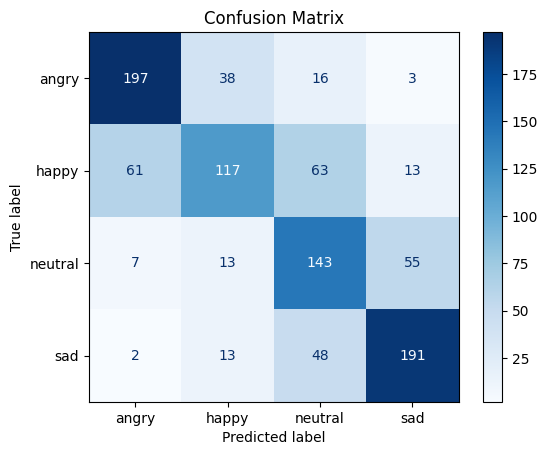


DecisionTree Accuracy: 66.122%
              precision    recall  f1-score   support

       angry       0.74      0.78      0.76       254
       happy       0.65      0.46      0.54       254
     neutral       0.53      0.66      0.59       218
         sad       0.73      0.75      0.74       254

    accuracy                           0.66       980
   macro avg       0.66      0.66      0.66       980
weighted avg       0.67      0.66      0.66       980



In [41]:
dt_model = DecisionTreeClassifier()
max_acc,best_model_params,best_prep_params = tune_ML_hppms('DecisionTree',dt_model,iters=1000,rs=930)

Total Time taken = 10 min 45 sec

Current Accuracy = 33.27%
Best Accuracy = 69.08% at iter=114
Best Model Params Found so far = {'C': 0.011946235158860568, 'kernel': 'linear', 'gamma': 5.3426869010487606e-05, 'coef0': 0.8306735915537479, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'random_state': 401}

Best Preprocessing Params Found so far = {'rs': 42, 'apply_smote': False, 'apply_LDA': False}

Hyperparameter Tuning Done!


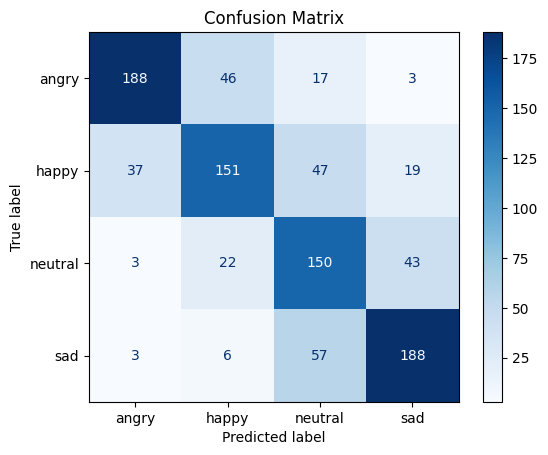


SVM Accuracy: 69.082%
              precision    recall  f1-score   support

       angry       0.81      0.74      0.78       254
       happy       0.67      0.59      0.63       254
     neutral       0.55      0.69      0.61       218
         sad       0.74      0.74      0.74       254

    accuracy                           0.69       980
   macro avg       0.70      0.69      0.69       980
weighted avg       0.70      0.69      0.69       980



In [28]:
svm_model = SVC()
max_acc,best_model_params,best_prep_params = tune_ML_hppms('SVM',svm_model,iters=300,rs=42)

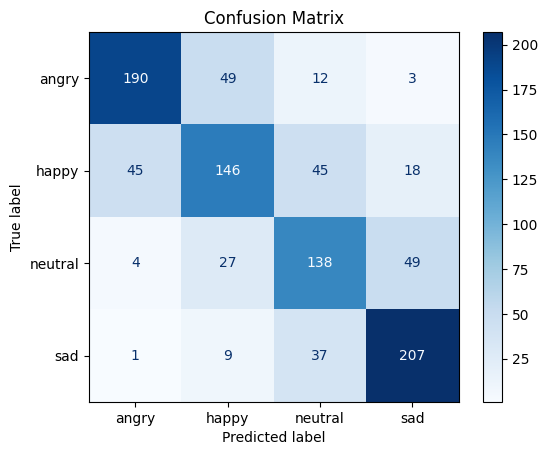


SVM Accuracy: 69.490%
              precision    recall  f1-score   support

       angry       0.79      0.75      0.77       254
       happy       0.63      0.57      0.60       254
     neutral       0.59      0.63      0.61       218
         sad       0.75      0.81      0.78       254

    accuracy                           0.69       980
   macro avg       0.69      0.69      0.69       980
weighted avg       0.70      0.69      0.69       980



In [31]:
svm_model = SVC(random_state=42)
acc_svm = preprocess_split_train_test(df,svm_model,'SVM',rs=42,apply_LDA=False)

Total Time taken = 5 min 11 sec

Current Accuracy = 66.63%
Best Accuracy = 69.08% at iter=6
Best Model Params Found so far = {'C': 0.07055027416777722, 'solver': 'lbfgs', 'class_weight': None, 'penalty': None, 'random_state': 901}

Best Preprocessing Params Found so far = {'rs': 205, 'apply_smote': False, 'apply_LDA': False}

Hyperparameter Tuning Done!


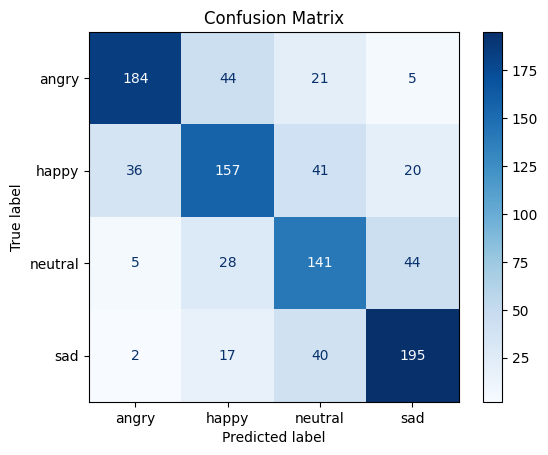


LogisticRegression Accuracy: 69.082%
              precision    recall  f1-score   support

       angry       0.81      0.72      0.77       254
       happy       0.64      0.62      0.63       254
     neutral       0.58      0.65      0.61       218
         sad       0.74      0.77      0.75       254

    accuracy                           0.69       980
   macro avg       0.69      0.69      0.69       980
weighted avg       0.70      0.69      0.69       980



In [24]:
lr_model = LogisticRegression(max_iter=1000)
max_acc,best_model_params,best_prep_params = tune_ML_hppms('LogisticRegression',lr_model,iters=50)

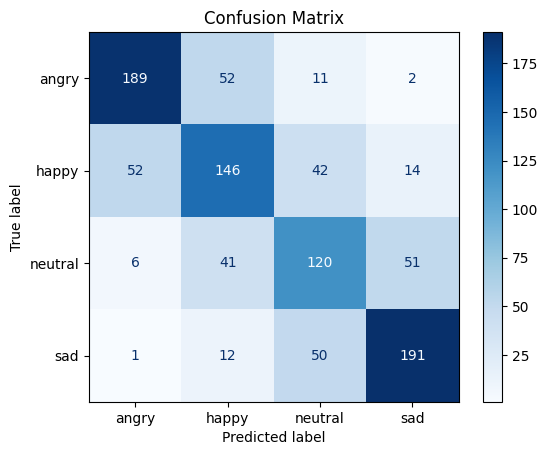


Random Forest Accuracy: 65.918%
              precision    recall  f1-score   support

       angry       0.76      0.74      0.75       254
       happy       0.58      0.57      0.58       254
     neutral       0.54      0.55      0.54       218
         sad       0.74      0.75      0.75       254

    accuracy                           0.66       980
   macro avg       0.66      0.66      0.66       980
weighted avg       0.66      0.66      0.66       980



In [38]:
rf_model = RandomForestClassifier(n_estimators=400,random_state=42)
acc_rf = preprocess_split_train_test(df,rf_model,'Random Forest',rs=42)

Total Time taken = 25 min 58 sec

Current Accuracy = 68.06%
Best Accuracy = 69.59% at iter=1
Best Model Params Found so far = {'n_estimators': 144, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True, 'class_weight': 'balanced', 'random_state': 329}

Best Preprocessing Params Found so far = {'rs': 183, 'apply_smote': False, 'apply_LDA': False}

Hyperparameter Tuning Done!


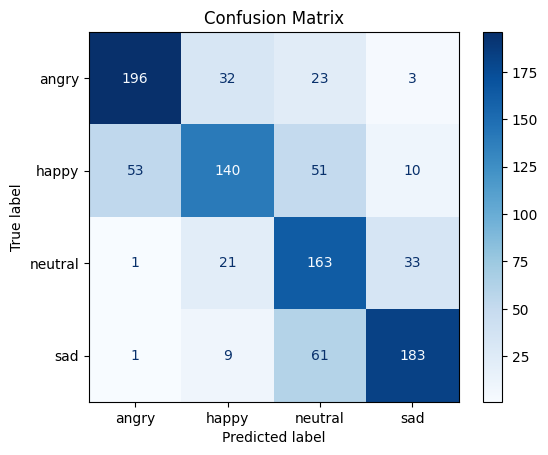


RandomForest Accuracy: 69.592%
              precision    recall  f1-score   support

       angry       0.78      0.77      0.78       254
       happy       0.69      0.55      0.61       254
     neutral       0.55      0.75      0.63       218
         sad       0.80      0.72      0.76       254

    accuracy                           0.70       980
   macro avg       0.71      0.70      0.69       980
weighted avg       0.71      0.70      0.70       980



ValueError: too many values to unpack (expected 2)

In [19]:
rf_model = RandomForestClassifier()
max_acc,best_params = tune_ML_hppms('RandomForest',rf_model,iters=50)

In [44]:
df.shape

(4899, 194)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def scale_n_split(feat,y,printshapes=True):
    trainX, testX, trainY, testY = train_test_split(feat, y, test_size=0.2, random_state=42,stratify=y)
    if printshapes:
      print("Samples in Training set =",trainX.shape[0])
      print("Samples in Testing set =",testX.shape[0])
    scaler = StandardScaler()
    trainX = scaler.fit_transform(trainX)
    testX = scaler.transform(testX)
    return trainX, testX, trainY, testY
def evaluatemodel(model, trainX, trainY, testX, testY,name,printany=True):
    model.fit(trainX, trainY)
    predictions = model.predict(testX)
    acc = accuracy_score(testY, predictions)
    if printany:
      cm = confusion_matrix(testY, predictions)
      ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Blues')
      plt.title(f"{name} Confusion Matrix")
      plt.show()
      print(f"{name} Accuracy: {acc*100:.3f}%")
      print(classification_report(testY, predictions))
    return acc
def traintestmodel(feat,y,title,rs=42,printany=True):
    trainX, testX, trainY, testY = scale_n_split(feat,y)
    mnames = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
    models = [LogisticRegression(random_state=rs),
              DecisionTreeClassifier(random_state=rs),
              RandomForestClassifier(n_estimators=400,random_state=rs),
              SVC(random_state=rs),
              KNeighborsClassifier()
              ]
    accuracies = []
    for mname, model in zip(mnames, models):
       accuracies.append(evaluatemodel(model,trainX,trainY,testX,testY,mname,printany=printany))
    print(f"\nAvg Accuracy = {np.mean(accuracies)*100:.3f}%\n")
    if printany:
      plt.figure(figsize=(8, 4))
      bars = plt.bar(mnames, accuracies)
      for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height*100:.2f}%', ha='center', va='bottom')
      plt.title(f'Accuracy Comparison of Different Models using {title} features')
      plt.xlabel('Models')
      plt.ylabel('Accuracy')
      plt.ylim(0, 1)
      plt.show()
    return dict(zip(mnames,accuracies))

Samples in Training set = 3919
Samples in Testing set = 980


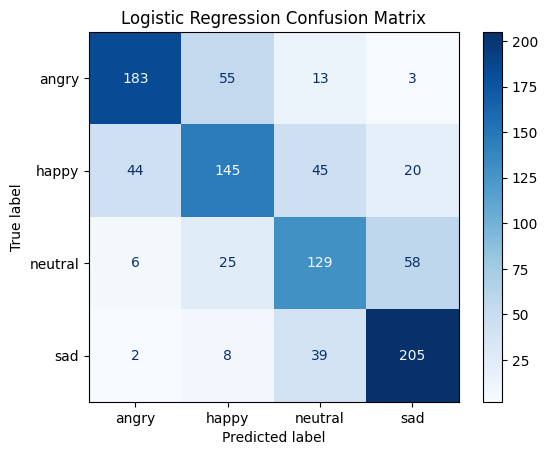

Logistic Regression Accuracy: 67.551%
              precision    recall  f1-score   support

       angry       0.78      0.72      0.75       254
       happy       0.62      0.57      0.60       254
     neutral       0.57      0.59      0.58       218
         sad       0.72      0.81      0.76       254

    accuracy                           0.68       980
   macro avg       0.67      0.67      0.67       980
weighted avg       0.68      0.68      0.67       980



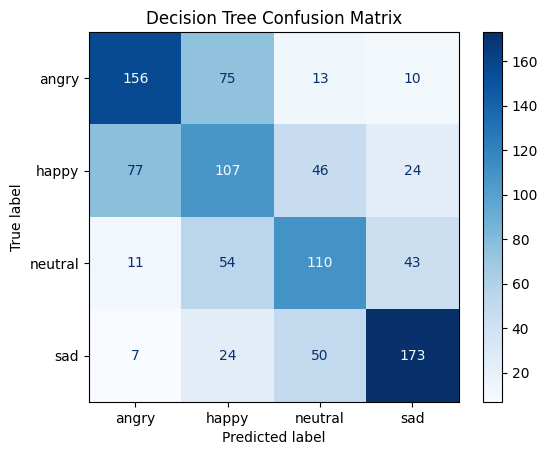

Decision Tree Accuracy: 55.714%
              precision    recall  f1-score   support

       angry       0.62      0.61      0.62       254
       happy       0.41      0.42      0.42       254
     neutral       0.50      0.50      0.50       218
         sad       0.69      0.68      0.69       254

    accuracy                           0.56       980
   macro avg       0.56      0.56      0.56       980
weighted avg       0.56      0.56      0.56       980



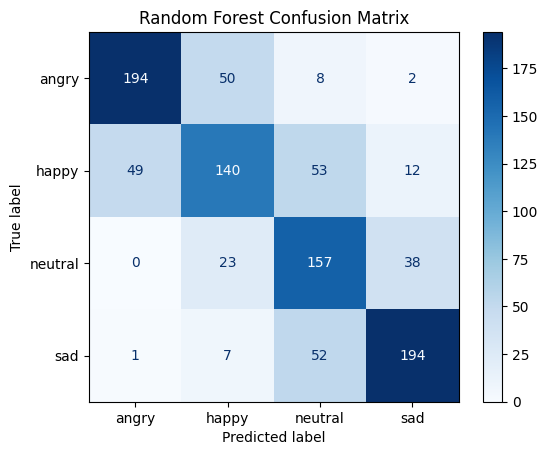

Random Forest Accuracy: 69.898%
              precision    recall  f1-score   support

       angry       0.80      0.76      0.78       254
       happy       0.64      0.55      0.59       254
     neutral       0.58      0.72      0.64       218
         sad       0.79      0.76      0.78       254

    accuracy                           0.70       980
   macro avg       0.70      0.70      0.70       980
weighted avg       0.70      0.70      0.70       980



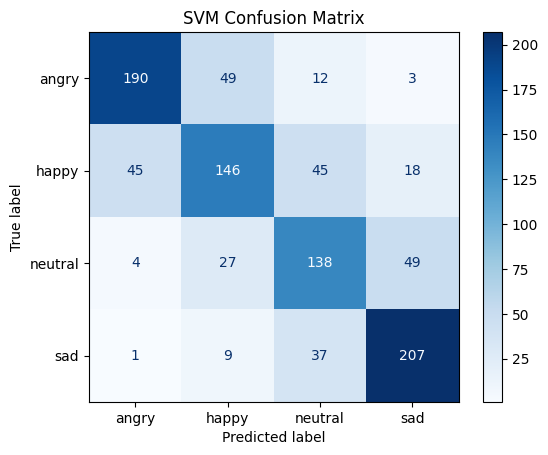

SVM Accuracy: 69.490%
              precision    recall  f1-score   support

       angry       0.79      0.75      0.77       254
       happy       0.63      0.57      0.60       254
     neutral       0.59      0.63      0.61       218
         sad       0.75      0.81      0.78       254

    accuracy                           0.69       980
   macro avg       0.69      0.69      0.69       980
weighted avg       0.70      0.69      0.69       980



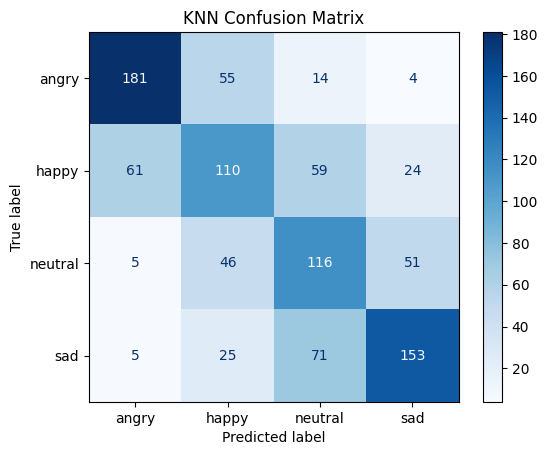

KNN Accuracy: 57.143%
              precision    recall  f1-score   support

       angry       0.72      0.71      0.72       254
       happy       0.47      0.43      0.45       254
     neutral       0.45      0.53      0.49       218
         sad       0.66      0.60      0.63       254

    accuracy                           0.57       980
   macro avg       0.57      0.57      0.57       980
weighted avg       0.58      0.57      0.57       980


Avg Accuracy = 63.959%



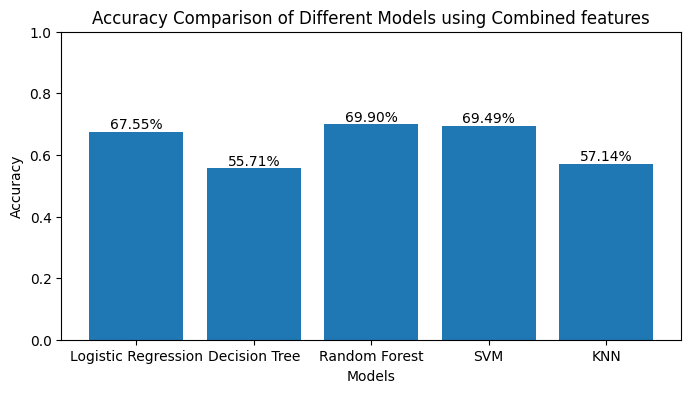

In [37]:
acc_comb = traintestmodel(xall,y,'Combined')

Samples in Training set = 3919
Samples in Testing set = 980


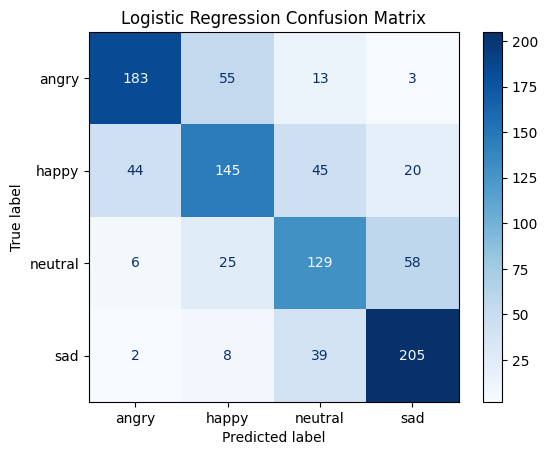

Logistic Regression Accuracy: 67.551%
              precision    recall  f1-score   support

       angry       0.78      0.72      0.75       254
       happy       0.62      0.57      0.60       254
     neutral       0.57      0.59      0.58       218
         sad       0.72      0.81      0.76       254

    accuracy                           0.68       980
   macro avg       0.67      0.67      0.67       980
weighted avg       0.68      0.68      0.67       980



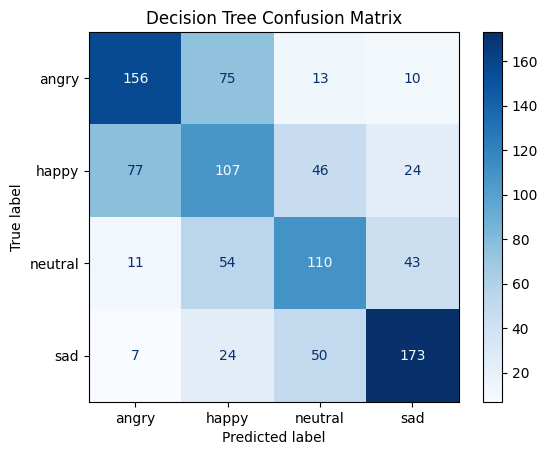

Decision Tree Accuracy: 55.714%
              precision    recall  f1-score   support

       angry       0.62      0.61      0.62       254
       happy       0.41      0.42      0.42       254
     neutral       0.50      0.50      0.50       218
         sad       0.69      0.68      0.69       254

    accuracy                           0.56       980
   macro avg       0.56      0.56      0.56       980
weighted avg       0.56      0.56      0.56       980



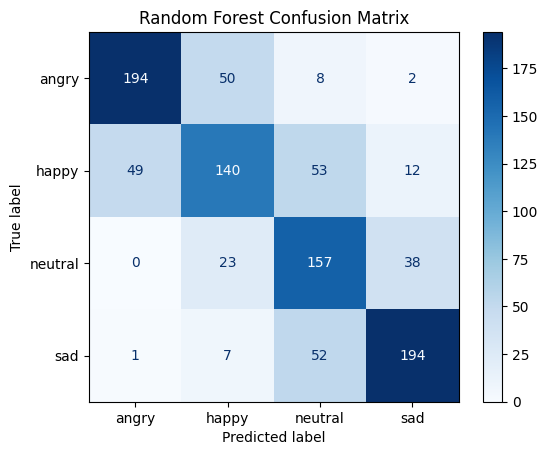

Random Forest Accuracy: 69.898%
              precision    recall  f1-score   support

       angry       0.80      0.76      0.78       254
       happy       0.64      0.55      0.59       254
     neutral       0.58      0.72      0.64       218
         sad       0.79      0.76      0.78       254

    accuracy                           0.70       980
   macro avg       0.70      0.70      0.70       980
weighted avg       0.70      0.70      0.70       980



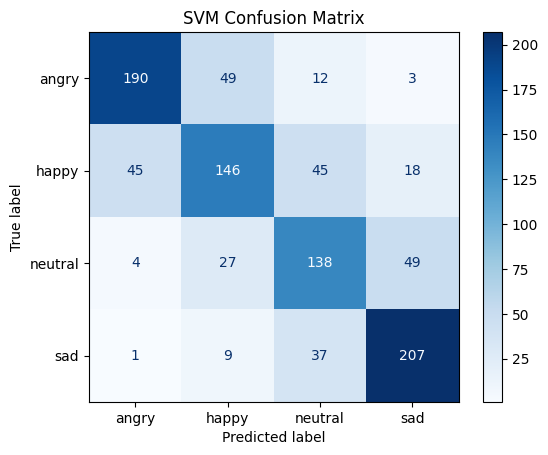

SVM Accuracy: 69.490%
              precision    recall  f1-score   support

       angry       0.79      0.75      0.77       254
       happy       0.63      0.57      0.60       254
     neutral       0.59      0.63      0.61       218
         sad       0.75      0.81      0.78       254

    accuracy                           0.69       980
   macro avg       0.69      0.69      0.69       980
weighted avg       0.70      0.69      0.69       980



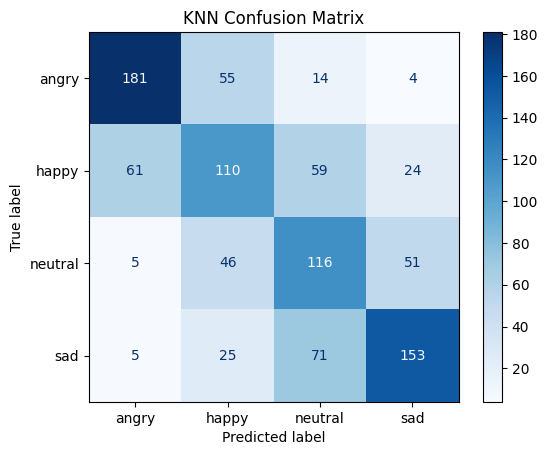

KNN Accuracy: 57.143%
              precision    recall  f1-score   support

       angry       0.72      0.71      0.72       254
       happy       0.47      0.43      0.45       254
     neutral       0.45      0.53      0.49       218
         sad       0.66      0.60      0.63       254

    accuracy                           0.57       980
   macro avg       0.57      0.57      0.57       980
weighted avg       0.58      0.57      0.57       980


Avg Accuracy = 63.959%



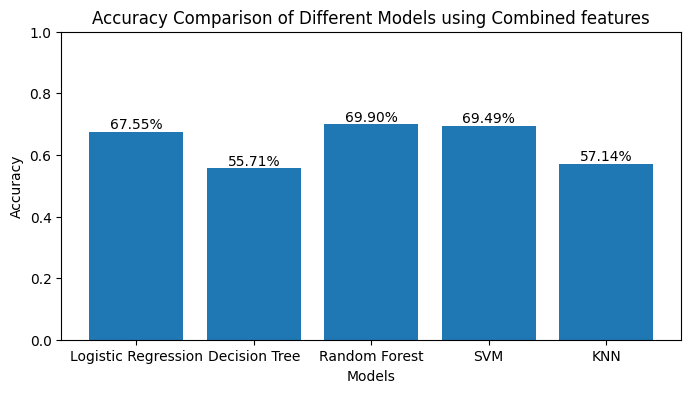

In [56]:
acc_comb = traintestmodel(xall,y,'Combined')

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adadelta,Adagrad,Adamax,Nadam
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE

In [58]:
def split_preprocess(df,apply_smote=False,rs=536,returnscalerle=False):
  x = df.drop(['label'], axis=1)
  y = df['label']
  trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2, random_state=rs,stratify=y)
  scaler = StandardScaler()
  trainX = scaler.fit_transform(trainX)
  testX = scaler.transform(testX)
  if apply_smote:
    smote = SMOTE(random_state=42)
    trainX, trainY = smote.fit_resample(trainX, trainY)
  le = LabelEncoder()
  trainY_enc = to_categorical(le.fit_transform(trainY))
  testY_enc = to_categorical(le.transform(testY))
  if returnscalerle:
    return trainX, testX, trainY, testY, trainY_enc,testY_enc, scaler,le
  return trainX, testX, trainY, testY,trainY_enc,testY_enc

In [59]:
trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = split_preprocess(df,rs=710,returnscalerle=True)
model = Sequential()
model.add(Input((trainX.shape[1],)))
model.add(Dense(20, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(trainY)), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │         3,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           324 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,884 (34.70 KB)

 Trainable params: 8,604 (33.61 KB)

 Non-trainable params: 280 (1.09 KB)

In [60]:
import shutil
mpath = '/kaggle/working/ann_model_cremad_4emo_mfcc.keras'
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=15, min_lr=0.00001),
             tf.keras.callbacks.ModelCheckpoint(filepath=mpath, monitor='val_accuracy', save_best_only=True,verbose=1)]
history = model.fit(trainX, trainY_enc, epochs=500, batch_size=32, validation_data=(testX, testY_enc),callbacks=callbacks)
_, accuracy = model.evaluate(testX, testY_enc)
print('\nAccuracy: %.2f' % (accuracy*100))
predictions = model.predict(testX)
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))
print(classification_report(testY, predicted_labels))
new_mpath = f"/kaggle/working/ann_model_cremad_4emo_mfcc_val_acc_{accuracy*100:.2f}.keras"
shutil.move(mpath, new_mpath)

Epoch 1/500


I0000 00:00:1732528294.096599     243 service.cc:145] XLA service 0x7f7a1400e840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732528294.096654     243 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732528294.096658     243 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 91/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3540 - loss: 2.7347

I0000 00:00:1732528299.347956     243 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3719 - loss: 2.6679
Epoch 1: val_accuracy improved from -inf to 0.55204, saving model to /kaggle/working/ann_model_cremad_4emo_mfcc.keras
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.3723 - loss: 2.6662 - val_accuracy: 0.5520 - val_loss: 2.0677 - learning_rate: 0.0010
Epoch 2/500
 99/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5108 - loss: 2.1328
Epoch 2: val_accuracy improved from 0.55204 to 0.59592, saving model to /kaggle/working/ann_model_cremad_4emo_mfcc.keras
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 2.1217 - val_accuracy: 0.5959 - val_loss: 1.8374 - learning_rate: 0.0010
Epoch 3/500
 98/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 1.9511
Epoch 3: val_accuracy improved from 0.59592 to 0.63367, saving model to /kaggle/working/ann_model_cremad_4emo_mfcc.keras
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 1.9380 - val_accuracy: 0.6337 - val_lo

'/kaggle/working/ann_model_cremad_4emo_mfcc_val_acc_68.27.keras'

In [61]:
from tensorflow.keras.regularizers import l1,l2,l1_l2
    
def getRandomHPPMS():
    params = {}
    params['rs_split'] = np.random.randint(0,1000)
    #params['rs_split'] = 6
    params['num_HL'] = np.random.randint(2,4+1)
    for i in range(1,params['num_HL']+1):
        params[f'units_{i}'] = np.random.choice(range(64,512+2,2))
        params[f'KR_{i}'] = np.random.choice(['l1','l2','l1l2','none'])
        params[f'BN_{i}'] = np.random.choice([True,False])
        #params[f'dropout_rate_{i}'] = np.random.choice(np.round(np.arange(0,0.5+0.1,0.1),1))
        params[f'dropout_rate_{i}'] = np.round(np.random.uniform(0,0.5),4)
    params['learning_rate'] = np.random.uniform(0.0001,0.005)
    optims = ['Adam','SGD','RMSprop','Adadelta','Adagrad','Adamax','Nadam']
    params['optimizer'] = np.random.choice(optims)
    params['batch_size'] = np.random.choice(range(32,132,4))
    params['adpLR'] = np.random.choice([True,False])
    params['apply_smote'] = np.random.choice([True,False])
    return params

def buildntrainmodel(params,feats,max_epochs=500):
    trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = split_preprocess(feats,rs=params['rs_split'],apply_smote=params['apply_smote'],returnscalerle=True)
    model = Sequential()
    model.add(Input((trainX.shape[1],)))
    for i in range(1,params['num_HL']+1):
        kern = {'l1':l1(),'l2':l2(),'l1l2':l1_l2(),'none':None}
        model.add(Dense(units=params[f'units_{i}'],activation='relu',kernel_regularizer=kern[params[f'KR_{i}']]))
        if params[f'BN_{i}']:
            model.add(BatchNormalization())
        if params[f'dropout_rate_{i}']>0:
            model.add(Dropout(params[f'dropout_rate_{i}']))
    model.add(Dense(len(np.unique(trainY)), activation='softmax'))
    optimizer_dict = {'Adam': Adam(learning_rate=params['learning_rate']),
                      'SGD': SGD(learning_rate=params['learning_rate']),
                      'RMSprop': RMSprop(learning_rate=params['learning_rate']),
                      'Adadelta': Adadelta(learning_rate=params['learning_rate']),
                      'Adagrad': Adagrad(learning_rate=params['learning_rate']),
                      'Adamax': Adamax(learning_rate=params['learning_rate']),
                      'Nadam': Nadam(learning_rate=params['learning_rate'])}
    
    model.compile(optimizer=optimizer_dict[params['optimizer']], loss='categorical_crossentropy', metrics=['accuracy'])
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)]
    if params['adpLR']:
        callbacks.append(tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=15, min_lr=0.00001))
    histann = model.fit(trainX, trainY_enc, epochs=max_epochs, batch_size=params['batch_size'],validation_data=(testX, testY_enc),callbacks=callbacks)
    _, accuracy = model.evaluate(testX, testY_enc)
    splits = (trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le)
    return accuracy,params,model,splits,histann

In [62]:
import IPython.display as ipd
import time
def plot_history(hist,acc,id):
  plt.figure(figsize=(12, 6))
  plt.suptitle(f'Training & Validation Curves for Best ANN Model - Val_Acc={acc*100:.2f}% at Trial #{id}', fontsize=16)
  plt.subplot(1, 2, 1)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')

  plt.subplot(1, 2, 2)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.tight_layout()
  plt.show()
    
def tune_hyperparams(ntrials,feats,max_epochs=500):
    max_acc = 0
    totm = 0
    phist = dict()
    histories = dict()
    for i in range(1,ntrials+1):
        st = time.time()
        print(f"\nRunning Trial #{i}\n")
        params = getRandomHPPMS()
        if i==1:
            best_params = params
        print(f"{'Current Value':<15}{'|Best Value So Far':<21}{'|Hyperparameter'}")
        print(f"{'-' * 15}|{'-' * 20}|{'-' * 15}")
        for param, value in params.items():
            best_value = best_params.get(param, 'N/A')
            if param=='learning_rate':
                best_value,value = round(best_value,3),round(value,3)
            print(f"{str(value):<15}|{str(best_value):<20}|{param}")
        print()
        acc,params,model,splits,histann = buildntrainmodel(params,feats,max_epochs=max_epochs)
        trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = splits
        fparams = frozenset(params.items())
        phist[fparams] = acc
        histories[i] = histann
        if acc>max_acc:
            max_acc = acc
            best_params = params
            best_trial = i
            best_model = model
        ipd.clear_output(wait=True)
        en = time.time()
        tm = en-st
        totm+=tm
        ep = len(histann.history['accuracy'])
        tracc = max(histann.history['accuracy'])
        print(f"Trial {i} Complete [{int(tm/3600)}h {int(tm/60)}m {int(tm%60)}s] - Trained for {ep} epochs")
        print(f"train_accuracy = {tracc*100:.3f}%")
        print(f"val_accuracy = {acc*100:.3f}%")
        print(f"Overfitting Difference = {(tracc-acc)*100:.3f}%\n")
        print(f"Best val_accuracy So Far: {max_acc*100:.3f}% at Trial #{best_trial}")
        print(f"Total time elapsed: [{int(totm/3600)}h {int(totm/60)}m {int(totm%60)}s]")
    print(f"Best Hyperparameters: {best_params}")
    print("Best Model Summary:")
    print(best_model.summary())
    best_hist = histories[best_trial]
    plot_history(best_hist,max_acc,best_trial)
    trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = split_preprocess(feats,rs=best_params['rs_split'],apply_smote=best_params['apply_smote'],returnscalerle=True)
    predictions = best_model.predict(testX)
    predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))
    cm = confusion_matrix(testY, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Best ANN Model")
    plt.show()
    print(f"\nAccuracy = {accuracy_score(testY,predicted_labels)*100:.3f}%\n")
    print(classification_report(testY, predicted_labels))
    best_model.save(f"/kaggle/working/ann_model_cremad_4emo_mfcc_val_acc_{max_acc*100:.2f}.keras")
    return max_acc, best_params, best_trial, best_model, phist,histories

Trial 20 Complete [0h 0m 28s] - Trained for 47 epochs
train_accuracy = 86.298%
val_accuracy = 68.061%
Overfitting Difference = 18.236%

Best val_accuracy So Far: 71.020% at Trial #9
Total time elapsed: [0h 9m 37s]
Best Hyperparameters: {'rs_split': 676, 'num_HL': 4, 'units_1': 414, 'KR_1': 'l1l2', 'BN_1': True, 'dropout_rate_1': 0.357, 'units_2': 174, 'KR_2': 'l2', 'BN_2': False, 'dropout_rate_2': 0.0341, 'units_3': 392, 'KR_3': 'none', 'BN_3': False, 'dropout_rate_3': 0.0617, 'units_4': 214, 'KR_4': 'none', 'BN_4': True, 'dropout_rate_4': 0.2921, 'learning_rate': 0.0016678693734614664, 'optimizer': 'Adam', 'batch_size': 108, 'adpLR': False, 'apply_smote': False}
Best Model Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 414)            │        80,316 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 414)            │         1,656 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 414)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 174)            │        72,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 174)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 392)            │        68,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 214)            │        84,102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 214)            │           856 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 214)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 4)              │           860 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,290 (3.52 MB)

 Trainable params: 307,344 (1.17 MB)

 Non-trainable params: 1,256 (4.91 KB)

 Optimizer params: 614,690 (2.34 MB)

None


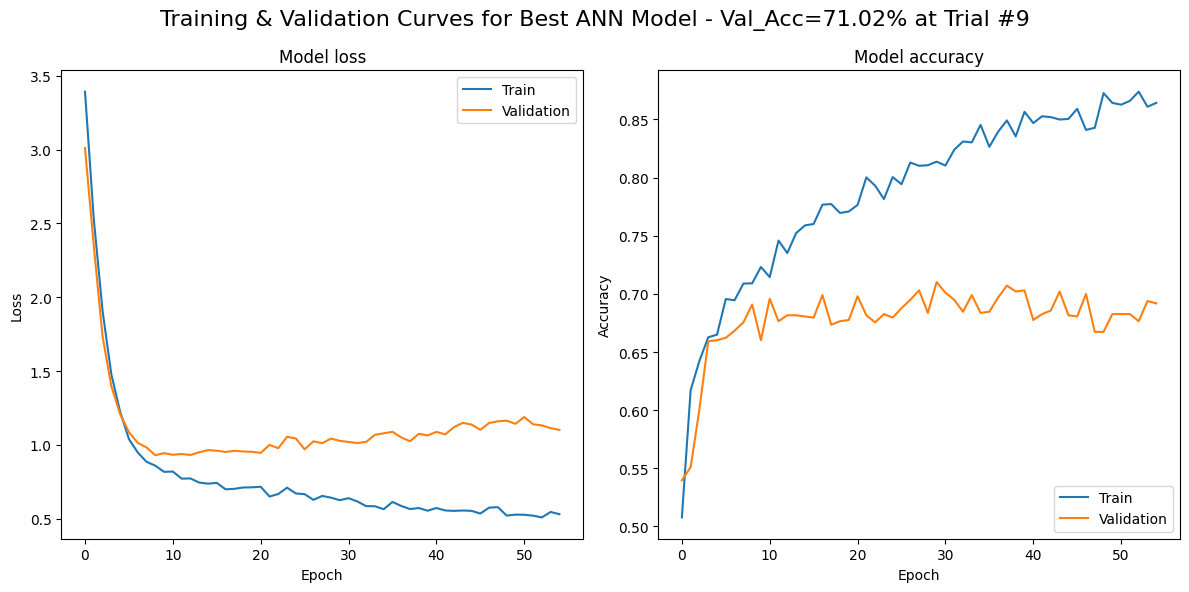

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


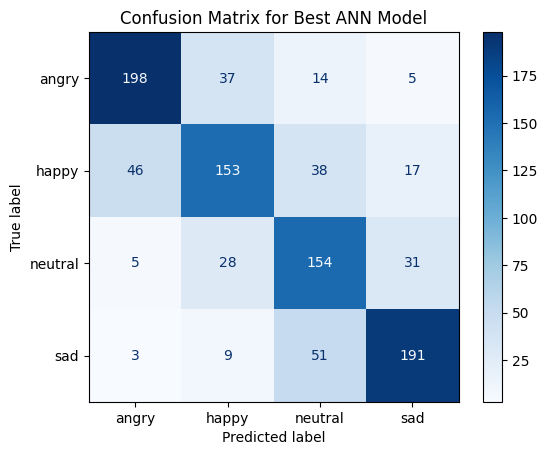


Accuracy = 71.020%

              precision    recall  f1-score   support

       angry       0.79      0.78      0.78       254
       happy       0.67      0.60      0.64       254
     neutral       0.60      0.71      0.65       218
         sad       0.78      0.75      0.77       254

    accuracy                           0.71       980
   macro avg       0.71      0.71      0.71       980
weighted avg       0.71      0.71      0.71       980



In [63]:
max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=20,feats=df,max_epochs=500)

Trial 20 Complete [0h 0m 31s] - Trained for 84 epochs
train_accuracy = 87.012%
val_accuracy = 68.163%
Overfitting Difference = 18.849%

Best val_accuracy So Far: 70.510% at Trial #19
Total time elapsed: [0h 9m 20s]
Best Hyperparameters: {'rs_split': 690, 'num_HL': 4, 'units_1': 128, 'KR_1': 'l1', 'BN_1': True, 'dropout_rate_1': 0.1951, 'units_2': 422, 'KR_2': 'l1l2', 'BN_2': False, 'dropout_rate_2': 0.0079, 'units_3': 486, 'KR_3': 'l2', 'BN_3': True, 'dropout_rate_3': 0.3652, 'units_4': 126, 'KR_4': 'l2', 'BN_4': True, 'dropout_rate_4': 0.1949, 'learning_rate': 0.00354825744309204, 'optimizer': 'Nadam', 'batch_size': 68, 'adpLR': True, 'apply_smote': False}
Best Model Summary:


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_167 (Dense)               │ (None, 128)            │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 422)            │        54,438 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_129 (Dropout)           │ (None, 422)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 486)            │       205,578 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 486)            │         1,944 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_130 (Dropout)           │ (None, 486)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 126)            │        61,362 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 126)            │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_131 (Dropout)           │ (None, 126)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 4)              │           508 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,046,077 (3.99 MB)

 Trainable params: 348,198 (1.33 MB)

 Non-trainable params: 1,480 (5.78 KB)

 Optimizer params: 696,399 (2.66 MB)

None


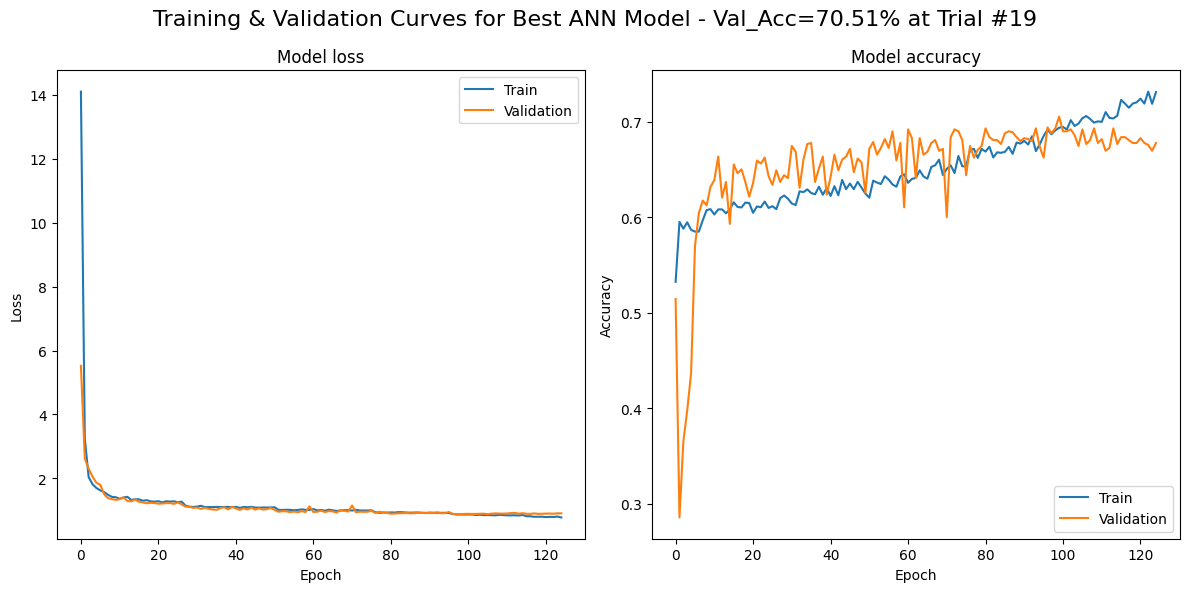

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


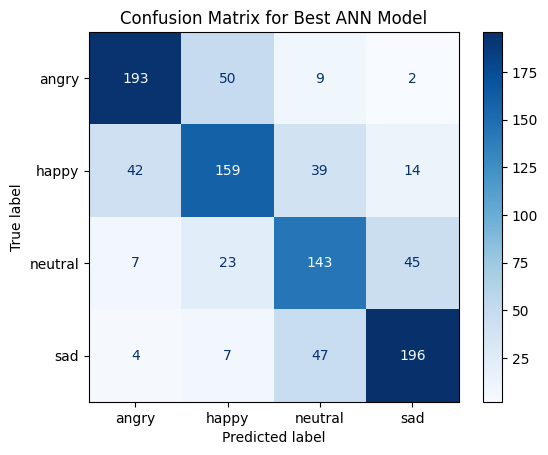


Accuracy = 70.510%

              precision    recall  f1-score   support

       angry       0.78      0.76      0.77       254
       happy       0.67      0.63      0.65       254
     neutral       0.60      0.66      0.63       218
         sad       0.76      0.77      0.77       254

    accuracy                           0.71       980
   macro avg       0.70      0.70      0.70       980
weighted avg       0.71      0.71      0.71       980



In [64]:
max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=20,feats=df,max_epochs=500)

Trial 20 Complete [0h 0m 21s] - Trained for 51 epochs
train_accuracy = 57.399%
val_accuracy = 58.469%
Overfitting Difference = -1.070%

Best val_accuracy So Far: 72.959% at Trial #9
Total time elapsed: [0h 8m 25s]
Best Hyperparameters: {'rs_split': 205, 'num_HL': 3, 'units_1': 98, 'KR_1': 'l1', 'BN_1': True, 'dropout_rate_1': 0.3248, 'units_2': 346, 'KR_2': 'l2', 'BN_2': False, 'dropout_rate_2': 0.2088, 'units_3': 68, 'KR_3': 'l1l2', 'BN_3': False, 'dropout_rate_3': 0.3141, 'learning_rate': 0.002367904536314642, 'optimizer': 'Adamax', 'batch_size': 32, 'adpLR': True, 'apply_smote': True}
Best Model Summary:


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_205 (Dense)               │ (None, 98)             │        19,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 98)             │           392 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_156 (Dropout)           │ (None, 98)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 346)            │        34,254 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_157 (Dropout)           │ (None, 346)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 68)             │        23,596 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_158 (Dropout)           │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 4)              │           276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,200 (907.04 KB)

 Trainable params: 77,334 (302.09 KB)

 Non-trainable params: 196 (784.00 B)

 Optimizer params: 154,670 (604.18 KB)

None


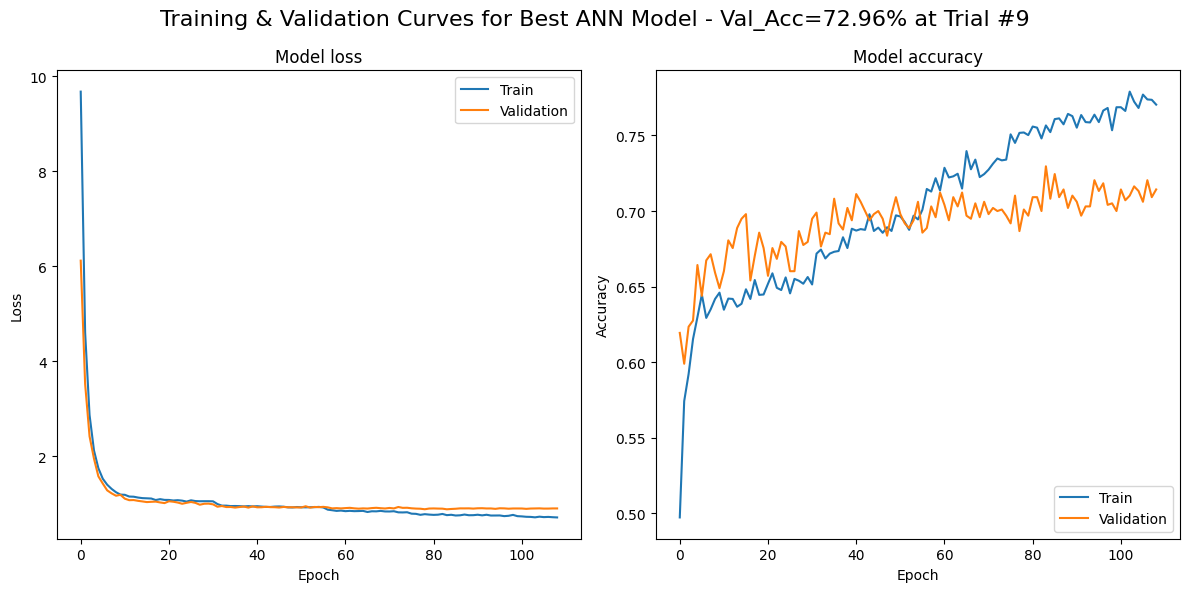

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


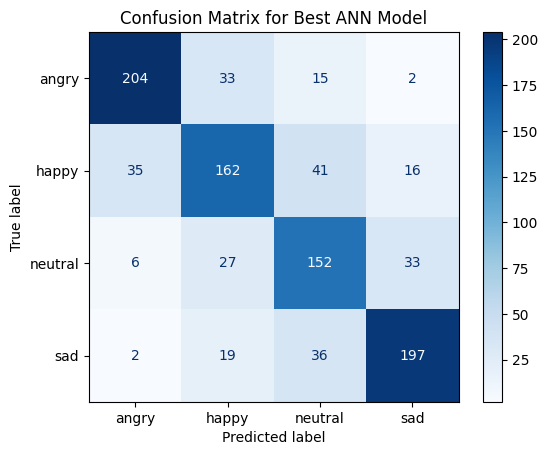


Accuracy = 72.959%

              precision    recall  f1-score   support

       angry       0.83      0.80      0.81       254
       happy       0.67      0.64      0.65       254
     neutral       0.62      0.70      0.66       218
         sad       0.79      0.78      0.78       254

    accuracy                           0.73       980
   macro avg       0.73      0.73      0.73       980
weighted avg       0.73      0.73      0.73       980



In [65]:
def getRandomHPPMS():
    params = {}
    #params['rs_split'] = np.random.randint(0,1000)
    params['rs_split'] = 205
    params['num_HL'] = np.random.randint(2,4+1)
    for i in range(1,params['num_HL']+1):
        params[f'units_{i}'] = np.random.choice(range(64,512+2,2))
        params[f'KR_{i}'] = np.random.choice(['l1','l2','l1l2','none'])
        params[f'BN_{i}'] = np.random.choice([True,False])
        #params[f'dropout_rate_{i}'] = np.random.choice(np.round(np.arange(0,0.5+0.1,0.1),1))
        params[f'dropout_rate_{i}'] = np.round(np.random.uniform(0,0.5),4)
    params['learning_rate'] = np.random.uniform(0.0001,0.005)
    optims = ['Adam','SGD','RMSprop','Adadelta','Adagrad','Adamax','Nadam']
    params['optimizer'] = np.random.choice(optims)
    params['batch_size'] = np.random.choice(range(32,132,4))
    params['adpLR'] = np.random.choice([True,False])
    params['apply_smote'] = np.random.choice([True,False])
    return params

max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=20,feats=df,max_epochs=500)

Trial 20 Complete [0h 0m 59s] - Trained for 285 epochs
train_accuracy = 59.939%
val_accuracy = 66.531%
Overfitting Difference = -6.592%

Best val_accuracy So Far: 70.714% at Trial #2
Total time elapsed: [0h 11m 17s]
Best Hyperparameters: {'rs_split': 205, 'num_HL': 2, 'units_1': 414, 'KR_1': 'l2', 'BN_1': True, 'dropout_rate_1': 0.4518, 'units_2': 354, 'KR_2': 'l2', 'BN_2': False, 'dropout_rate_2': 0.044, 'learning_rate': 0.00032711610994025754, 'optimizer': 'RMSprop', 'batch_size': 64, 'adpLR': True, 'apply_smote': False}
Best Model Summary:


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_333 (Dense)               │ (None, 414)            │        80,316 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_130         │ (None, 414)            │         1,656 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_251 (Dropout)           │ (None, 414)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_334 (Dense)               │ (None, 354)            │       146,910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_252 (Dropout)           │ (None, 354)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_335 (Dense)               │ (None, 4)              │         1,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,778 (1.75 MB)

 Trainable params: 229,474 (896.38 KB)

 Non-trainable params: 828 (3.23 KB)

 Optimizer params: 229,476 (896.39 KB)

None


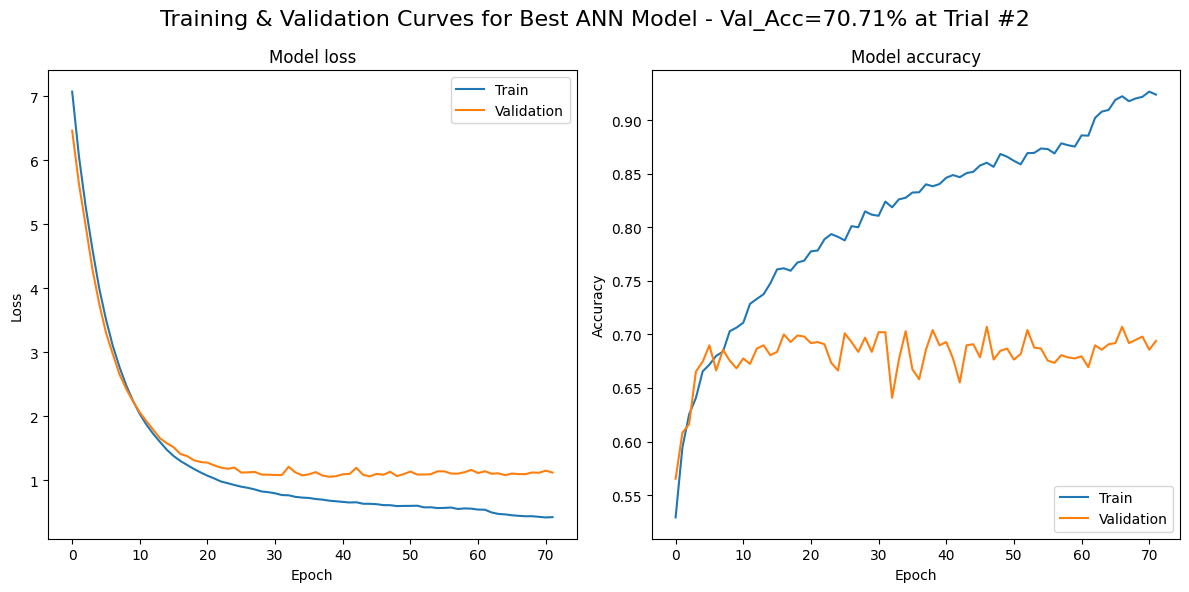

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


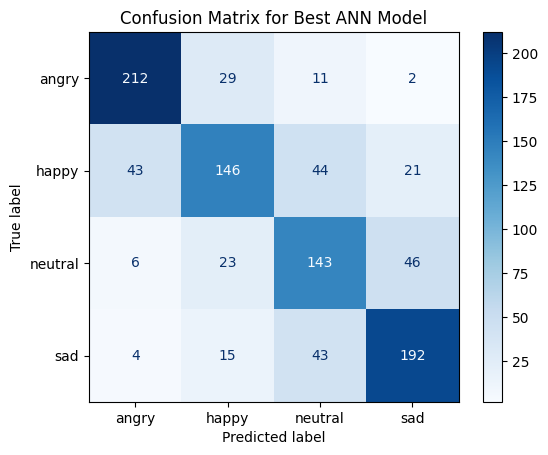


Accuracy = 70.714%

              precision    recall  f1-score   support

       angry       0.80      0.83      0.82       254
       happy       0.69      0.57      0.63       254
     neutral       0.59      0.66      0.62       218
         sad       0.74      0.76      0.75       254

    accuracy                           0.71       980
   macro avg       0.70      0.71      0.70       980
weighted avg       0.71      0.71      0.71       980



In [67]:
max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=20,feats=df,max_epochs=500)